### Import relevant modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datetime import datetime
pd.options.mode.chained_assignment = None  # default='warn'

### Access the movies dataset here: https://www.kaggle.com/rounakbanik/the-movies-dataset

 ### Import data files and start exploring data at a high-level

In [2]:
#import credits csv files into dataframes
credits = pd.read_csv('credits.csv')

In [3]:
#see dataframe
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [4]:
#get info
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
cast    45476 non-null object
crew    45476 non-null object
id      45476 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [5]:
#Drop any duplicates in credits based on id
credits = credits.drop_duplicates(subset=['id'])

In [6]:
#import movies csv file into dataframes
movies = pd.read_csv('movies_metadata.csv',low_memory=False)

In [7]:
#drop irrelevant columns: 'homepage','overview', 'original_title', 'imdb_id', 'spoken_languages', 
#'production_companies', 'production_countries','poster_path','popularity','tagline','video'
movies_dropped = movies.drop(columns = ['homepage','overview', 'original_title', 'spoken_languages',
                                        'production_companies', 'production_countries','imdb_id',
                                        'poster_path','popularity','tagline','video'])


In [8]:
movies_dropped.head()

,adult,belongs_to_collection,budget,genres,id,original_language,release_date,revenue,runtime,status,title,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,1995-12-22,0.0,101.0,Released,Grumpier Old Men,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0


In [9]:
#Look at data info
movies_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 13 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
id                       45466 non-null object
original_language        45455 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
status                   45379 non-null object
title                    45460 non-null object
vote_average             45460 non-null float64
vote_count               45460 non-null float64
dtypes: float64(4), object(9)
memory usage: 4.5+ MB


In [10]:
#Drop any duplicates in movies_dropped based on id
movies_dropped = movies_dropped.drop_duplicates(subset=['id'])

### Fix errors in column types for 'budget' and 'id' columns

In [11]:
#Note that budget is not a numeric type. Convert budget to numeric.
movies_dropped['budget'] = pd.to_numeric(movies_dropped['budget'], errors='coerce')

#Note that id is also not a numeric type. Convert id to numeric
movies_dropped['id'] = pd.to_numeric(movies_dropped['id'], errors='coerce')

movies_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45436 entries, 0 to 45465
Data columns (total 13 columns):
adult                    45436 non-null object
belongs_to_collection    4491 non-null object
budget                   45433 non-null float64
genres                   45436 non-null object
id                       45433 non-null float64
original_language        45425 non-null object
release_date             45349 non-null object
revenue                  45430 non-null float64
runtime                  45173 non-null float64
status                   45349 non-null object
title                    45430 non-null object
vote_average             45430 non-null float64
vote_count               45430 non-null float64
dtypes: float64(6), object(7)
memory usage: 4.9+ MB


### Identify missing revenue and budget values as null and drop rows will null values in these columns

In [12]:
#Look at data statistics
#Note that many movies are showing a budget and revenue of 0. There are also movies with a runtime of 0.
movies_dropped.describe()

,budget,id,revenue,runtime,vote_average,vote_count
count,4.543300e+04,45433.000000,4.543000e+04,45173.00000,45430.000000,45430.000000
mean,4.224549e+06,108375.226179,1.121288e+07,94.12430,5.618329,109.935989
std,1.742799e+07,112479.760366,6.435213e+07,38.41554,1.924139,491.466335
min,0.000000e+00,2.000000,0.000000e+00,0.00000,0.000000,0.000000
25%,0.000000e+00,26461.000000,0.000000e+00,85.00000,5.000000,3.000000
50%,0.000000e+00,59996.000000,0.000000e+00,95.00000,6.000000,10.000000
75%,0.000000e+00,157351.000000,0.000000e+00,107.00000,6.800000,34.000000
max,3.800000e+08,469172.000000,2.787965e+09,1256.00000,10.000000,14075.000000


In [13]:
#Number of movies with 0 revenue
movies_dropped[movies_dropped.revenue==0]['revenue'].count()

38032

In [14]:
#Number of movies with 0 budget
movies_dropped[movies_dropped.budget==0]['budget'].count()

36553

In [15]:
#Replace 0s in revenue and budget with null values
movies_dropped['revenue'] = movies_dropped['revenue'].replace(0,np.nan)
movies_dropped['budget'] = movies_dropped['budget'].replace(0,np.nan)

#Drop rows with null revenue and budget
movies_dropped = movies_dropped.dropna(subset=['revenue','budget'])

### Similarly, identify missing runtime, vote_average, and vote_count values (0) as null and drop from dataframe

In [16]:
#Identify number of movies with runtime = 0
movies_dropped[movies_dropped.runtime==0]['runtime'].count()

11

In [17]:
#Identify number of movies with runtime = 0
movies_dropped[movies_dropped.vote_average==0]['vote_average'].count()

7

In [18]:
#Identify number of movies with runtime = 0
movies_dropped[movies_dropped.vote_count==0]['vote_average'].count()

7

In [19]:
#Set runtime=0,vote_average,vote_count values as null
movies_dropped['runtime'] = movies_dropped['runtime'].replace(0,np.nan)
movies_dropped['vote_average'] = movies_dropped['vote_average'].replace(0,np.nan)
movies_dropped['vote_count'] = movies_dropped['vote_count'].replace(0,np.nan)

In [20]:
#Drop rows with null runtime values
movies_dropped = movies_dropped.dropna(subset = ['runtime','vote_average','vote_count'])

In [21]:
#Check for null entries. 4135 null belongs_to_collection left, indicating the movies that don't belong to a 
#collection.
movies_dropped.isnull().sum()

adult                       0
belongs_to_collection    4135
budget                      0
genres                      0
id                          0
original_language           0
release_date                0
revenue                     0
runtime                     0
status                      0
title                       0
vote_average                0
vote_count                  0
dtype: int64

### If the movie belongs to a collection (i.e. franchise), extract the name of the collection and replace any null values with 0s to indicate no collection.

In [22]:
#Convert 'belongs_to_collection' column to dictionaries and Nans
movies_dropped.belongs_to_collection = movies_dropped.belongs_to_collection.apply(lambda x: ast.literal_eval(x) 
                                                                                  if type(x) != float else None)


In [23]:
#Extract collection name in new column, 0 if none
movies_dropped['collection'] = movies_dropped.belongs_to_collection.apply(lambda x: x['name'] 
                                                                          if type(x) == dict else 0)


In [24]:
#Drop original 'belongs_to_collection' column
movies_dropped = movies_dropped.drop(columns = ['belongs_to_collection'])

In [25]:
#Look at statistics for updated data
#Note that now movies seem to have a budget and revenue of single digits ($1) which seems unlikely.
movies_dropped.describe()

,budget,id,revenue,runtime,vote_average,vote_count
count,5.356000e+03,5356.000000,5.356000e+03,5356.000000,5356.000000,5356.000000
mean,3.119983e+07,60461.286221,9.069922e+07,110.047050,6.283943,735.556385
std,4.022028e+07,95592.121111,1.664321e+08,21.502907,0.896771,1253.526284
min,1.000000e+00,5.000000,1.000000e+00,26.000000,1.000000,1.000000
25%,5.207500e+06,8758.250000,7.125805e+06,95.000000,5.700000,78.000000
50%,1.700000e+07,14331.000000,3.000000e+07,106.000000,6.300000,278.500000
75%,4.000000e+07,59860.250000,1.000050e+08,120.000000,6.900000,807.000000
max,3.800000e+08,443319.000000,2.787965e+09,338.000000,9.100000,14075.000000


### The table above shows single-digit revenue and budget values which is likely a result of erroneous data capture. Upon further inspection, multiple movies were found to have incorrectly low budget and revenue values. Since most movies are not made under 10,000 dollars and gross more than 1,500 dollars, these values were used as a budget cutoff and revenue cutoff, respectively, to safely exclude such erroneous values from the data.

In [26]:
#Number of movies that have a budget of less than $10,000 = 57
movies_dropped[movies_dropped.budget < 10000]['budget'].count()

57

In [27]:
#Drop extremely low budget movies since data might not be reliable (single digit budgets) and it is only 59 movies
movies_clean = movies_dropped[movies_dropped.budget>10000]

In [28]:
#Revenue is still showing minimum values in single digits.
movies_clean.describe()

,budget,id,revenue,runtime,vote_average,vote_count
count,5.297000e+03,5297.000000,5.297000e+03,5297.000000,5297.000000,5297.000000
mean,3.154734e+07,60326.669436,9.167072e+07,110.134038,6.282953,742.784406
std,4.030792e+07,95614.810333,1.670924e+08,21.501497,0.895977,1258.487144
min,1.117800e+04,5.000000,3.000000e+00,26.000000,1.000000,1.000000
25%,6.000000e+06,8653.000000,7.594693e+06,95.000000,5.700000,81.000000
50%,1.700000e+07,14194.000000,3.055339e+07,106.000000,6.300000,284.000000
75%,4.000000e+07,59797.000000,1.008538e+08,120.000000,6.900000,816.000000
max,3.800000e+08,443319.000000,2.787965e+09,338.000000,9.100000,14075.000000


In [29]:
#Number of movies that have a revenue of less than $1,500 = 57
movies_dropped[movies_dropped.revenue < 1500]['revenue'].count()

57

In [30]:
#Drop movies with revenue <$1500
movies_clean = movies_clean[movies_clean.revenue>=1500]

### Remove 'adult' column since all movies are categorized as 'False'.

In [31]:
#Look at distribution in adult column
movies_clean.adult.value_counts()

False    5283
Name: adult, dtype: int64

In [32]:
#Since no movies are adult movies, remove adult column
movies_clean = movies_clean.drop(columns = ['adult'])

### To merge the credits and movies dataframes, set 'id' column type as int to match the credits dataframe.

In [33]:
#Set id type as int to match credits dataframe
movies_clean.id = movies_clean.id.astype('int')

### Merge the credits and movies dataframes on the 'id' column.

In [34]:
#Merge movies and credits dataframes on ID
df = pd.merge(movies_clean,credits,on='id', how='left')

In [35]:
#Look at merged dataframe
df.head()

,budget,genres,id,original_language,release_date,revenue,runtime,status,title,vote_average,vote_count,collection,cast,crew
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,Toy Story Collection,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
3,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,1995-12-15,187436818.0,170.0,Released,Heat,7.7,1886.0,0,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de..."
4,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,en,1995-12-22,64350171.0,106.0,Released,Sudden Death,5.5,174.0,0,"[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de..."


### The data in cast, crew, genres columns are stored as strings. Convert type to lists or dictionaries, identifying missing data as null and removing rows with missing data in these columns.

In [36]:
#Turn cast column into list
df['cast'] = df['cast'].apply(ast.literal_eval)

In [37]:
#Turn crew column into list
df['crew'] = df['crew'].apply(ast.literal_eval)

In [38]:
#Turn genre column into a list
df['genres'] = df.genres.apply(ast.literal_eval)

In [39]:
#Identify rows with missing cast and set them to null
df.cast = df.cast.apply(lambda x: np.nan if len(x)==0 else x)

In [40]:
#Identify rows with missing crew and set them to null
df.crew = df.crew.apply(lambda x: np.nan if len(x)==0 else x)

In [41]:
#Identify movies with no genres and replace with null
df.genres = df.genres.apply(lambda x: np.nan if len(x)==0 else x)

In [42]:
#Drop rows with null values
df = df.dropna(subset = ['crew', 'cast', 'genres'])

### Extract the name of the lead actor as the first-listed actor in the 'cast' column, and the name of the director from the 'crew' column. Drop the original 'cast' and 'crew' columns.

In [43]:
#Get lead actor from cast column
df['actor'] = df.cast.apply(lambda x: x[0]['name'])

In [44]:
#Get director from crew column
df['director'] = df.crew.apply(lambda row: next((item for item in row if item["job"] == "Director"), np.nan)['name'])

In [45]:
#Drop original cast, crew, genres columns
df = df.drop(columns = ['cast', 'crew'])

### Since each movie is typically associated with more than 1 genre, convert the genre variables into dummy/indicator variables (i.e. a binary column for each genre)

In [46]:
#Function to convert list of dictionaries to list of genre names
def genre_to_list(x):
    lst = []
    for i in range(len(x)):
        lst.append(x[i]['name'])
    return lst

In [47]:
#Apply function to convert genre column and create binary genre columns
df['genres'] = df.genres.apply(genre_to_list)
genre_columns = pd.get_dummies(df.genres.apply(pd.Series).stack()).sum(level=0)

In [48]:
#Add genre binary columns to df
df = df.join(genre_columns)

### Import IMDB list of highest-grossing actors and highest-grossing directors. Create binary columns indicating whether the lead actor and director are on the highest-grossing lists.

In [49]:
#Import highest grossing actors and directors databases
top_actors = pd.read_csv('actors_highest_grossing.csv',encoding='ISO-8859-1', usecols = ['Name'])
top_directors = pd.read_csv('directors_highest_grossing.csv',encoding='ISO-8859-1', usecols = ['Name'])

In [50]:
#Binary top_actor column indicating whether lead actor is on highest-grossing list (1 if yes, 0 if no)
df['top_actor'] = df.actor.isin(top_actors.Name).astype(int)

In [51]:
#Binary top_director column indicating whether director is on highest-grossing list (1 if yes, 0 if no)
df['top_director'] = df.director.isin(top_directors.Name).astype(int)

### Only keep released movies to ensure accurate budget and revenue information

In [52]:
#Remove rumored and post-production movies (n = 4) because revenue and budget are likely not reliable
df = df[df.status == 'Released']

In [53]:
#Drop status column since it is all released movies
df = df.drop(columns = ['status'])

### Convert the release_date column into a datetime column and categorize the dates into seasons, holidays, and months. 

In [54]:
#Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [55]:
#Define function to convert release dates into holidays/seasons
def season(x):
    #if february and close to valentines day = Valentine's day
    if (x.month == 2) and (10 <= x.day <= 20):
        return '''Valentine's Day'''
    #if late november or december = Holiday Season
    elif (x.month == 11 and x.day >= 15) or (x.month == 12):
        return 'Holiday Season'
    #if in May, June, or July = Summer
    elif (5 <= x.month <= 7):
        return "Summer"
    #if september and close to labor day
    elif (x.month == 9) and (1 <= x.day <= 7):
        return 'Labor Day'
    #if january and close to mlk day
    elif (x.month == 1) and (15 <= x.day <= 21):
        return 'MLK Day'
    #else just return month
    else:
        #return x.strftime("%B")
        return 'Off_Season'

In [56]:
#Add column for release season
df['release_season'] = df['release_date'].apply(season)

### Add a column to define success as a categorical variable (e.g. break-even, hit, flop) based on the ROI. ROI, in this case, is defined as the ratio of revenue to budget.

In [57]:
#Add ROI column (revenue/budget) to determine success
df['roi'] = df.revenue/df.budget

In [58]:
#Define function to convert ratio to categorical variables
def success(x):
    if x >= 3.5:
        return 'Hit'
    elif (x < 3.5) and (x >= 1.2):
        return 'Break Even'
    else:
        return 'Flop'

In [59]:
#Add column of categorial variables
df['success_cat'] = df.roi.apply(success)

In [60]:
df.success_cat.value_counts()

Break Even    1837
Flop          1804
Hit           1621
Name: success_cat, dtype: int64

### Reset index and rearrange columns, ensuring all column names are lowercase and have no spaces

In [61]:
#reset index
df = df.reset_index(drop=True)

In [62]:
#Rearrange columns and change all column names to lowercase with no spaces
cols = df.columns.tolist()
cols = ['title','id','collection','budget','genres','release_date','runtime','vote_average','vote_count',
        'original_language','actor','director','Action','Adventure','Animation','Comedy','Crime','Documentary','Drama',
        'Family','Fantasy','Foreign','History','Horror','Music','Mystery','Romance','Science Fiction','TV Movie',
        'Thriller','War','Western','top_actor','top_director','release_season','revenue','roi','success_cat']
df = df[cols]

In [63]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [64]:
#Visualize final data
df.head()

,title,id,collection,budget,genres,release_date,runtime,vote_average,vote_count,original_language,...,tv_movie,thriller,war,western,top_actor,top_director,release_season,revenue,roi,success_cat
0,Toy Story,862,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",1995-10-30,81.0,7.7,5415.0,en,...,0,0,0,0,1,1,Off_Season,373554033.0,12.451801,Hit
1,Jumanji,8844,0,65000000.0,"[Adventure, Fantasy, Family]",1995-12-15,104.0,6.9,2413.0,en,...,0,0,0,0,1,0,Holiday Season,262797249.0,4.043035,Hit
2,Waiting to Exhale,31357,0,16000000.0,"[Comedy, Drama, Romance]",1995-12-22,127.0,6.1,34.0,en,...,0,0,0,0,0,0,Holiday Season,81452156.0,5.090760,Hit
3,Heat,949,0,60000000.0,"[Action, Crime, Drama, Thriller]",1995-12-15,170.0,7.7,1886.0,en,...,0,1,0,0,0,0,Holiday Season,187436818.0,3.123947,Break Even
4,Sudden Death,9091,0,35000000.0,"[Action, Adventure, Thriller]",1995-12-22,106.0,5.5,174.0,en,...,0,1,0,0,0,0,Holiday Season,64350171.0,1.838576,Break Even


In [65]:
#Confirm all columns are of the right type and have no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5262 entries, 0 to 5261
Data columns (total 38 columns):
title                5262 non-null object
id                   5262 non-null int64
collection           5262 non-null object
budget               5262 non-null float64
genres               5262 non-null object
release_date         5262 non-null datetime64[ns]
runtime              5262 non-null float64
vote_average         5262 non-null float64
vote_count           5262 non-null float64
original_language    5262 non-null object
actor                5262 non-null object
director             5262 non-null object
action               5262 non-null uint8
adventure            5262 non-null uint8
animation            5262 non-null uint8
comedy               5262 non-null uint8
crime                5262 non-null uint8
documentary          5262 non-null uint8
drama                5262 non-null uint8
family               5262 non-null uint8
fantasy              5262 non-null uint8
foreign  

In [66]:
df.describe()

,id,budget,runtime,vote_average,vote_count,action,adventure,animation,comedy,crime,...,romance,science_fiction,tv_movie,thriller,war,western,top_actor,top_director,revenue,roi
count,5262.000000,5.262000e+03,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,...,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5.262000e+03,5262.000000
mean,60112.900608,3.172721e+07,110.200304,6.287723,747.364690,0.265108,0.180160,0.054922,0.343216,0.160965,...,0.186811,0.119156,0.000190,0.281072,0.038008,0.016914,0.120487,0.075827,9.223473e+07,8.548629
std,95596.536029,4.037863e+07,21.505426,0.891516,1261.375204,0.441433,0.384357,0.227850,0.474828,0.367534,...,0.389797,0.324003,0.013786,0.449565,0.191235,0.128960,0.325561,0.264746,1.674949e+08,187.682173
min,5.000000,1.117800e+04,26.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.596000e+03,0.000210
25%,8584.750000,6.000000e+06,95.000000,5.700000,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.900000e+06,0.802727
50%,14085.000000,1.750000e+07,106.000000,6.300000,287.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.106662e+07,2.077324
75%,59184.500000,4.000000e+07,120.000000,6.900000,830.500000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.015876e+08,4.239585
max,443319.000000,3.800000e+08,338.000000,9.100000,14075.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.787965e+09,12890.386667


In [67]:
#Write to file
df.to_csv('cleaned.csv',index=False)

# Data Visualization & Statistical Analysis

In [68]:
#Import modules for statistical analysis
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

### Copy df to cleaned for data visualization (to avoid overwriting cleaned df)

In [69]:
cleaned = df

### Specify the default seaborn style

In [70]:
sns.set(style="darkgrid", color_codes=True)

### Visualize any outliers in ROI, Revenue and Budget

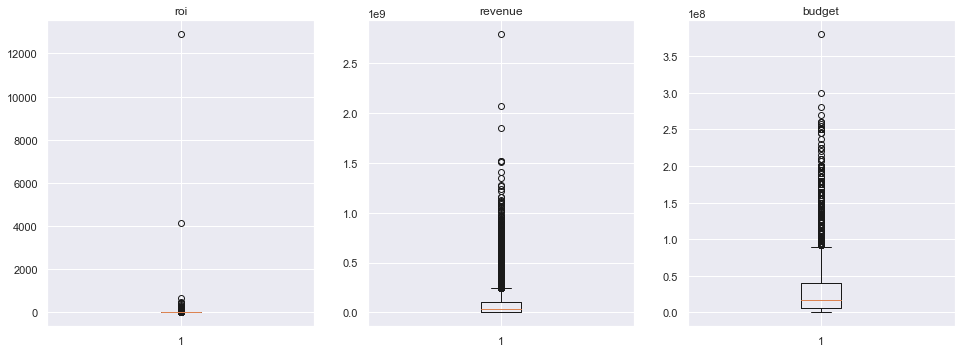

In [71]:
fig, axs = plt.subplots(1,3,figsize=(14,5))
_ = axs[0].boxplot(cleaned.roi)
axs[0].set_title('roi')
_ = axs[1].boxplot(cleaned.revenue)
axs[1].set_title('revenue')
_ = axs[2].boxplot(cleaned.budget)
axs[2].set_title('budget')
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=1.5, wspace=0.2)

The boxplot for ROI shows a number of extreme outliers with high ROI values. These points are reflective of movies made on smaller budgets that performed exceedingly well at the box-office (e.g. Paranormal Activity). 

The boxplot for revenue shows a large number of outliers on the high end (greater than ~200 M USD). These refer to movies that are often categorized as blockbusters (e.g. Star Wars, Jurassic Park). Since movie revenues are increasing (see below), these movies will still be taken into account in the initial analysis.

The budget boxplot shows a large number of outliers with high budgets (greater than ~100M USD). With the budget of movies increasing (see analysis below), these high-budget movies will also be included in the initial analysis.

### What does the distribution of budgets, revenue and ROI look like?

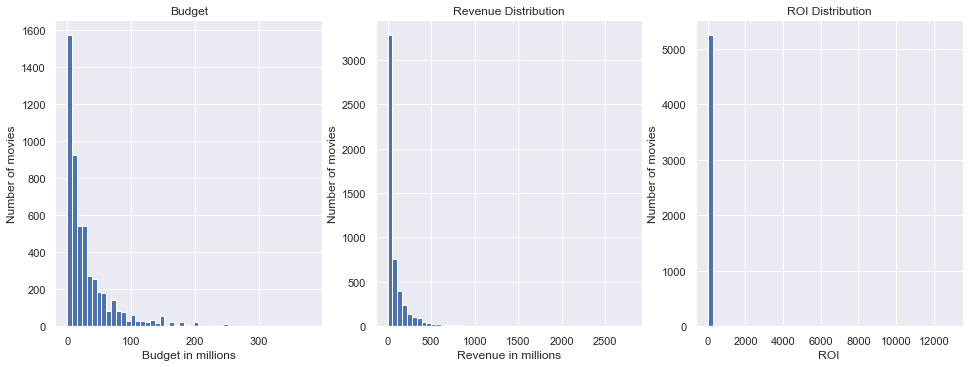

In [72]:
#Distribution of budgets
fig, axs = plt.subplots(1,3,figsize=(14,5))
axs[0].hist(cleaned.budget.apply(lambda x: x/1e6),bins=50)
axs[0].set_xlabel('Budget in millions')
axs[0].set_ylabel('Number of movies')
axs[0].set_title('Budget')

axs[1].hist(cleaned.revenue.apply(lambda x: x/1e6),bins=50)
axs[1].set_xlabel('Revenue in millions')
axs[1].set_ylabel('Number of movies')
axs[1].set_title('Revenue Distribution')

axs[2].hist(cleaned.roi,bins=50)
axs[2].set_xlabel('ROI')
axs[2].set_ylabel('Number of movies')
axs[2].set_title('ROI Distribution')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=1.5, wspace=0.2)

It should be noted that while all 3 distributions of numerical variables are pretty heavily skewed to the right, the ROI distribution is particularly skewed due to outliers. In such extreme cases, a log transformation of the variable might yield better prediction results.

Text(0.5,1,'Log(ROI) Distribution')

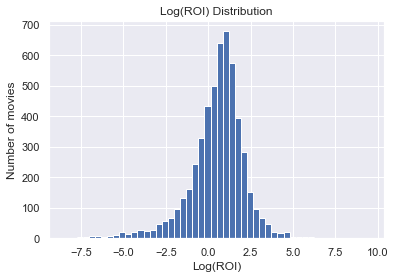

In [73]:
#Plot the log-transformation of ROI
_ = plt.hist(np.log(cleaned.roi),bins=50)
plt.xlabel('Log(ROI)')
plt.ylabel('Number of movies')
plt.title('Log(ROI) Distribution')

The plot above shows that log transformation of the ROI results in a distribution that more closely resembles a normal distribution. The initial base model will first be fitted on the original data, followed by the log-transformed ROI model in order to better understand the effect of a log transformation.

### What does the distribution of categorial success look like?

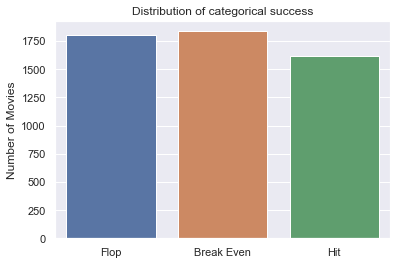

In [74]:
_ = sns.countplot(x="success_cat", data=cleaned,order=['Flop','Break Even','Hit'])
_ = plt.xlabel('')
_ = plt.ylabel('Number of Movies')
_ = plt.title('Distribution of categorical success')

The distribution of categorical success, shown below, is fairly even with the number of hits being slightly slower than flops or break-evens.

### Relationship between categorical success and budget

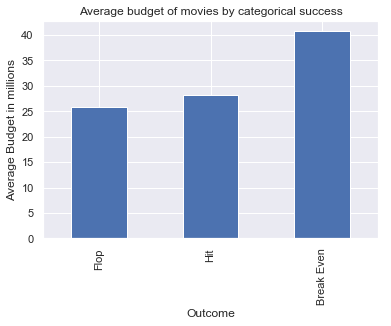

In [75]:
#Relationship between average budget and cat success
_ = cleaned[['success_cat','budget']].groupby('success_cat').mean().apply(lambda x: x/1e6).sort_values('budget').plot(kind='bar',legend=None)
_ = plt.title('Average budget of movies by categorical success')
_ = plt.ylabel('Average Budget in millions')
_ = plt.xlabel('Outcome')

The average budget is lowest for movies that are flops and hits, and ~15M higher for movies that broke even. This phenomenon can be interpreted in two different ways. Note that categorical success is based on the ratio of revenue to budget (ROI). While having a lower budget can increase the ROI, having too low of a budget can affect the quality, reputation, and star power of a movie, thus resulting in significantly lower revenues, which is the case for flops. On the other hand, having a lower budget also allows the movie to recover their costs more easily and be categorized as a hit. Whether a lower-budget movie is a hit or flop likely depends on other factors such as genre, star power, release season etc.

### Which release season typically results in the highest movie revenues?

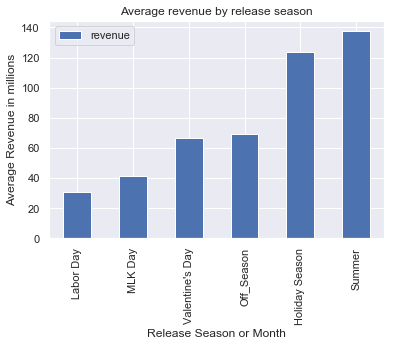

In [76]:
#Relationship between release_season and average revenue
_ = cleaned[['release_season','revenue']].groupby('release_season').mean().apply(lambda x: x/1e6).sort_values('revenue').plot(kind='bar')
_ = plt.title('Average revenue by release season')
_ = plt.xlabel('Release Season or Month')
_ = plt.ylabel('Average Revenue in millions')

Movies released in the summer make the most money on average followed by the holiday season. Holidays like Labor Day, Valentine’s Day, or MLK Day don't appear to have much of an impact.

### How has movie revenue and budgets changed over the years?

Text(0.5,0,'Year')

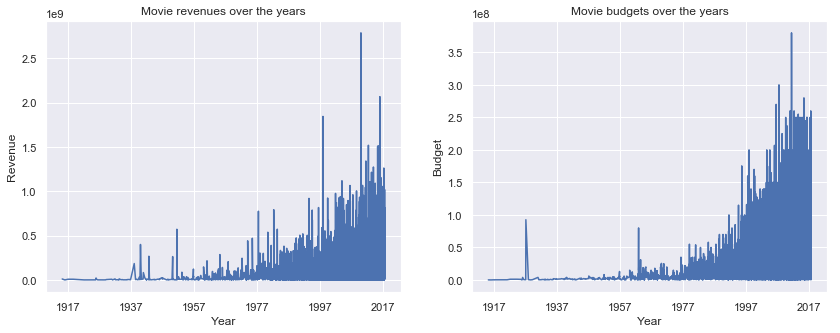

In [77]:
fig, axs = plt.subplots(1,2,figsize=(14,5))

temp = cleaned[['release_date','revenue']].sort_values('release_date')
axs[0].plot(temp.release_date, temp.revenue)
axs[0].set_title('Movie revenues over the years')
axs[0].set_ylabel('Revenue')
axs[0].set_xlabel('Year')

temp = cleaned[['release_date','budget']].sort_values('release_date')
axs[1].plot(temp.release_date, temp.budget)
axs[1].set_title('Movie budgets over the years')
axs[1].set_ylabel('Budget')
axs[1].set_xlabel('Year')

Overall, both movie revenues and movie budgets have been steadily increasing since the 1980s, with the budgets seeing a steeper increase since the 2000s. Keeping this in mind, it may be important to keep the outliers in the budget and revenue data initially since they could be representative of the general trend of higher budgets and revenues.

### Do movies that belong to a collection typically gross higher than movies that do not?

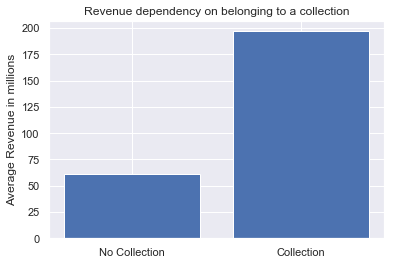

In [78]:
#Average revenue when belonging to a collection vs when not
no_collection = cleaned[cleaned.collection == 0].revenue.mean()
#Average revenue when belonging to a collection vs when not
collection = cleaned[cleaned.collection != 0].revenue.mean()

_ = plt.bar(['No Collection', 'Collection'],[no_collection/1e6,collection/1e6],align='center')
_ = plt.ylabel('Average Revenue in millions')
_ = plt.title('Revenue dependency on belonging to a collection')

#### Is the difference in average revenue statistically significant?

In [79]:
#Null hypothesis: Mean revenues are equal for movies that belong to a collection and movies that don't
#Alternate hypothesis: Mean revenues are not equal for movies that belong to a collection and movies that don't

stat,p = stats.ttest_ind(cleaned[cleaned.collection == 0].revenue,cleaned[cleaned.collection != 0].revenue)
print('test-statistic:', format(stat,'.3f'))
print('p-value:', format(p,'.3e'))
if p < 0.01:
    print('Reject null hypothesis: Sample means are not equal')
else:
    print('Fail to reject null hypothesis: Sample means are equal')

test-statistic: -26.412
p-value: 1.817e-144
Reject null hypothesis: Sample means are not equal


Movies that belong to a collection (i.e. franchise) gross, on average, almost 4 times higher than movies that do not belong to a collection. Statistically, this difference in mean revenue is significant as observed by the t-test, which resulted in a p-value close to 0 indicating that the means for these 2 groups are not equal. 

### Does having a top actor as the lead have an impact on movie revenue and/or ROI?

#### Revenue

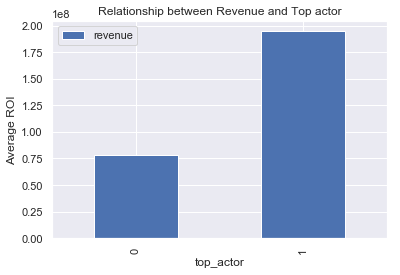

In [80]:
#Relationship between having a top actor and roi
_ = cleaned[['top_actor','revenue']].groupby('top_actor').mean().plot(kind='bar')
_ = plt.title('Relationship between Revenue and Top actor')
_ = plt.ylabel('Average ROI')

#### ROI

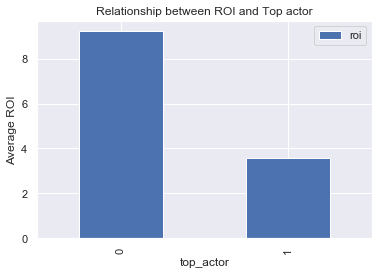

In [81]:
#Relationship between having a top actor and roi
_= cleaned[['top_actor','roi']].groupby('top_actor').mean().plot(kind='bar')
_ = plt.title('Relationship between ROI and Top actor')
_ = plt.ylabel('Average ROI')

#### Are these observed differences in average revenue/ROI between movies with top actors and movies without top actors statistically significant? - Mann-Whitney U Test

In [82]:
#H0: the distributions of both samples are equal.
#H1: the distributions of both samples are not equal.

stat,p = stats.mannwhitneyu(cleaned[cleaned.top_actor == 0].revenue,cleaned[cleaned.top_actor == 1].revenue)
print('test-statistic:', format(stat,'.3f'))
print('p-value:', format(p,'.3e'))
if p < 0.05:
    print('Reject null hypothesis: Revenue distributions of both samples are not equal')
else:
    print('Fail to reject null hypothesis: Revenue distributions of both samples are equal')

test-statistic: 793807.500
p-value: 6.884e-79
Reject null hypothesis: Revenue distributions of both samples are not equal


In [83]:
#H0: the distributions of both samples are equal.
#H1: the distributions of both samples are not equal.

stat,p = stats.mannwhitneyu(cleaned[cleaned.top_actor == 0].roi,cleaned[cleaned.top_actor == 1].roi)
print('test-statistic:', format(stat,'.3f'))
print('p-value:', format(p,'.3e'))
if p < 0.05:
    print('Reject null hypothesis: ROI distributions of both samples are not equal')
else:
    print('Fail to reject null hypothesis: ROI distributions of both samples are equal')

test-statistic: 1321462.000
p-value: 2.463e-05
Reject null hypothesis: ROI distributions of both samples are not equal


A top actor is defined as any actor appearing on highest grossing actors list on IMDB. While having a top actor as a lead does result in a much higher revenue on average (~200M vs 50M USD), it also results in a lower average ROI (~75% decrease), likely due to the higher compensation top actors demand. The difference in revenue and ROI distributions are statistically different for movies with and without top actors, as confirmed by the non-parametric Mann-Whitney U test, which resulted in a p-value close to 0 for both revenue and ROI.

### Does having a top director have an impact on movie revenue and/or ROI?

#### Revenue

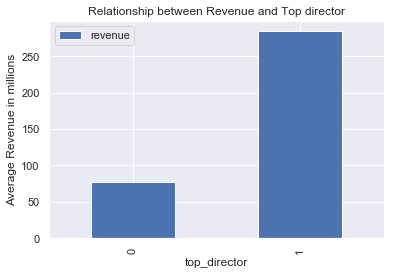

In [84]:
#Relationship between having a top director and revenue
_ = cleaned[['top_director','revenue']].groupby('top_director').mean().apply(lambda x: x/1e6).plot(kind='bar')
_ = plt.title('Relationship between Revenue and Top director')
_ = plt.ylabel('Average Revenue in millions')

#### ROI

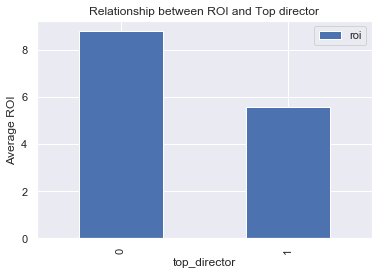

In [85]:
#Relationship between having a top director and roi
_ = cleaned[['top_director','roi']].groupby('top_director').mean().plot(kind='bar')
_ = plt.title('Relationship between ROI and Top director')
_ = plt.ylabel('Average ROI')

#### Are these observed differences in average revenue/ROI between movies with top directors and movies without top directors statistically significant? - Mann-Whitney U Test

In [86]:
#H0: the distributions of both samples are equal.
#H1: the distributions of both samples are not equal.

stat,p = stats.mannwhitneyu(cleaned[cleaned.top_director == 0].revenue,cleaned[cleaned.top_director == 1].revenue)
print('test-statistic:', format(stat,'.3f'))
print('p-value:', format(stat,'.3e'))
if p < 0.05:
    print('Reject null hypothesis: Revenue istributions of both samples are not equal')
else:
    print('Fail to reject null hypothesis: Revenueistributions of both samples are equal')

test-statistic: 392744.500
p-value: 3.927e+05
Reject null hypothesis: Revenue istributions of both samples are not equal


In [87]:
stat,p = stats.mannwhitneyu(cleaned[cleaned.top_director == 0].roi,cleaned[cleaned.top_director == 1].roi)
print('test-statistic:', stat)
print('p-value:', p)
if p < 0.05:
    print('Reject null hypothesis: ROI distributions of both samples are not equal')
else:
    print('Fail to reject null hypothesis:  ROI distributions of both samples are equal')

test-statistic: 730181.0
p-value: 9.626003569320504e-17
Reject null hypothesis: ROI distributions of both samples are not equal


A top director is defined as any director appearing on highest grossing actors list on IMDB. Similar to hiring a top actor, a top director also results in a much higher average revenue (~280M vs 75M USD). However, while the ROI is lower with a top director, it still almost twice as large as the ROI with a top actor. This could indicate that hiring a top director can result in higher revenues on lower budgets (i.e. higher ROIs), compared to hiring a top actor.

Similar to the analysis for top actors, the Mann-Whitney U test can be used to compare the differences in revenue and ROI since both samples follow a non-normal distribution. The test concluded that the revenues for both samples (movies with top directors and movies without) are from different population distributions. The same conclusion was reached for the ROI data. 


### What genres are associated with the highest revenues and ROIs?

In [88]:
#Create temporary df with separate rows for each genre
temp = cleaned.genres.apply(pd.Series).stack().reset_index(level=1,drop=True).to_frame('temp_genre')
#Merge with 'cleaned' dataset to have a separate rows for each genre
temp = pd.merge(cleaned,temp,left_index=True,right_index=True)
#Group revenues and budgets by genre and calculate the average for each genre
x = temp[['temp_genre','revenue','budget','roi']].groupby('temp_genre').mean().head(10)

#### Highest Average Revenues

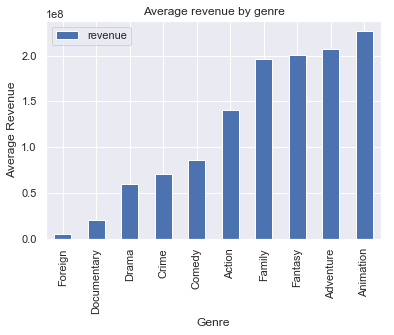

In [89]:
_ = x[['revenue']].sort_values('revenue').plot(kind='bar')
_ = plt.title('Average revenue by genre')
_ = plt.ylabel('Average Revenue')
_ = plt.xlabel('Genre')

#### Highest ROIs

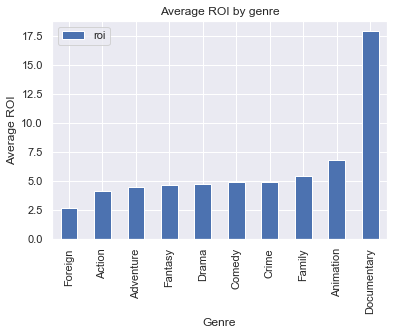

In [90]:
_ = x[['roi']].sort_values('roi').plot(kind='bar')
_ = plt.title('Average ROI by genre')
_ = plt.ylabel('Average ROI')
_ = plt.xlabel('Genre')

Animated movies appear to have the highest average revenue followed closely by family, fantasy, and adventure. Foreign films, documentaries and dramas appear to have the lowest average revenues.

Documentary films have the highest ROI by far, followed by animated movies. Most other genres (except for foreign) result in similar ROIs on average.

### Is there a relationship between genre and categorical success?

#### Chisquare test of independence

In [91]:
#Create contingency table for chisquare test of independence
contingency_table = pd.crosstab(temp.temp_genre, temp.success_cat, margins = False)

#Conduct chisquare test
chi2,p,dof,expected = stats.chi2_contingency(contingency_table)
print('test-statistic:', format(chi2,'.3f'))
print('p-value:', format(p,'.3e'))
print('degrees of freedom:', dof)

#Check p-value against significance level of 0.05
if p < 0.05:
    print('Reject null hypothesis: There is a relationship between genre and categorical success')
else:
    print('Fail to reject null hypothesis: There is no relationship between genre and categorical success')

test-statistic: 159.190
p-value: 8.940e-17
degrees of freedom: 38
Reject null hypothesis: There is a relationship between genre and categorical success


The chi square test of independence resulted in a p-value close to 0, thus rejecting the null hypothesis of independence between genre and categorical success. It can, therefore, be concluded that there is a statistically significant correlation between the two variables.

## Machine Learning

In [92]:
#Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Additional cleaning to prepare data for Machine Learning algorithms

In [93]:
cleaned.head()

,title,id,collection,budget,genres,release_date,runtime,vote_average,vote_count,original_language,...,tv_movie,thriller,war,western,top_actor,top_director,release_season,revenue,roi,success_cat
0,Toy Story,862,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",1995-10-30,81.0,7.7,5415.0,en,...,0,0,0,0,1,1,Off_Season,373554033.0,12.451801,Hit
1,Jumanji,8844,0,65000000.0,"[Adventure, Fantasy, Family]",1995-12-15,104.0,6.9,2413.0,en,...,0,0,0,0,1,0,Holiday Season,262797249.0,4.043035,Hit
2,Waiting to Exhale,31357,0,16000000.0,"[Comedy, Drama, Romance]",1995-12-22,127.0,6.1,34.0,en,...,0,0,0,0,0,0,Holiday Season,81452156.0,5.090760,Hit
3,Heat,949,0,60000000.0,"[Action, Crime, Drama, Thriller]",1995-12-15,170.0,7.7,1886.0,en,...,0,1,0,0,0,0,Holiday Season,187436818.0,3.123947,Break Even
4,Sudden Death,9091,0,35000000.0,"[Action, Adventure, Thriller]",1995-12-22,106.0,5.5,174.0,en,...,0,1,0,0,0,0,Holiday Season,64350171.0,1.838576,Break Even


The collection and release_season columns have strings as variables that need to be converted to numerical variables for regression and classification algorithms

In [94]:
#Create separate collection column as binary column
cleaned['collection_or_not'] = [cleaned.collection != 0][0].astype(int)

In [95]:
#Convert release_season into dummy variables
release_season_columns = pd.get_dummies(df.release_season.apply(pd.Series).stack()).sum(level=0)

In [96]:
#Convert all seasons to lowercase without spaces
release_season_columns.columns = release_season_columns.columns.str.replace(' ','_').str.lower()
release_season_columns=release_season_columns.rename(columns = {'''valentine's_day''':'valentines_day'})

In [97]:
#Add release_season binary columns to cleaned = dfb
df = cleaned.join(release_season_columns)

In [98]:
# Set binary columns (uint8 type) as 'categorical' variables for correlation matrix
cat_columns = ['action', 'adventure', 'animation', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'foreign', 'history',
       'horror', 'music', 'mystery', 'romance', 'science_fiction', 'tv_movie',
       'thriller', 'war', 'western', 'top_actor', 'top_director','collection_or_not',
       'holiday_season', 'labor_day', 'mlk_day','off_season', 'summer', 'valentines_day']
for i in cat_columns:
    df[i] = df[i].astype('category')

In [99]:
df.columns

Index(['title', 'id', 'collection', 'budget', 'genres', 'release_date',
       'runtime', 'vote_average', 'vote_count', 'original_language', 'actor',
       'director', 'action', 'adventure', 'animation', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'foreign', 'history',
       'horror', 'music', 'mystery', 'romance', 'science_fiction', 'tv_movie',
       'thriller', 'war', 'western', 'top_actor', 'top_director',
       'release_season', 'revenue', 'roi', 'success_cat', 'collection_or_not',
       'holiday_season', 'labor_day', 'mlk_day', 'off_season', 'summer',
       'valentines_day'],
      dtype='object')

In [100]:
#Dataframe to be used for regression
#Drop unnecessary columns, including off-season to avoid multicollinearity
reg_df = df.drop(['title','id','collection','genres','release_date','original_language',
                 'actor','director','release_season','off_season'],axis=1)

## Correlation Matrix of Numerical Features and Targets

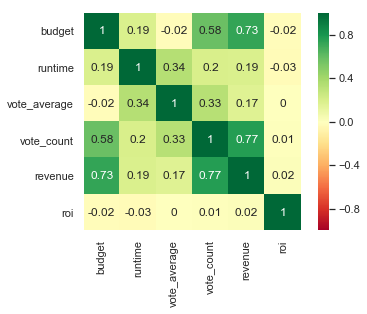

In [101]:
#Correlation matrix
_ = sns.heatmap(reg_df.corr().round(2),square=True,annot=True,cmap='RdYlGn',vmin=-1, vmax=1)

Budget and vote count appear to have the strongest correlation with revenue (coefficients of 0.73 and 0.77, respectively), while none of the numeric features show a direct correlation with ROI. None of the features exhibit signs of collinearity since none of the correlation coefficients are greater than ~0.8

## Multicollinearity Analysis

VIF Factor WITH budget as a feature (as it is for revenue)

In [102]:
#Get features
feature_x = reg_df.drop(['roi','success_cat','revenue'],axis=1)
#Convert features to float arrays
feature_x_arr = np.array(feature_x, dtype=float)

#VIF Factor dataframe
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(feature_x_arr, i) for i in range(feature_x_arr.shape[1])]
vif["features"] = feature_x.columns
vif.sort_values(by='VIF',ascending=False).head()

,VIF,features
2,38.221020,vote_average
1,36.378651,runtime
0,3.405193,budget
10,3.131515,drama
3,2.413300,vote_count


VIF Factor WITHOUT budget as a feature (as it is for roi and success_cat)

In [103]:
feature_x = reg_df.drop(['budget','roi','success_cat','revenue'],axis=1)
feature_x_arr = np.array(feature_x, dtype=float)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(feature_x_arr, i) for i in range(feature_x_arr.shape[1])]
vif["features"] = feature_x.columns
vif.sort_values(by='VIF',ascending=False).head()

,VIF,features
1,36.178945,vote_average
0,33.302901,runtime
9,3.123802,drama
6,2.052409,comedy
20,2.051560,thriller


Both vote_average and runtime have a very high VIF Factor, with vote_average being higher than runtime, suggesting that these variables exhibit multicollinearity. Drop vote_average and re-do VIF Factor analysis to assess if this fixes the problem of multicollinearity.

In [104]:
#Drop vote_average and re-do VIF Factor analysis
feature_x = reg_df.drop(['budget','roi','success_cat','revenue','vote_average'],axis=1)
feature_x_arr = np.array(feature_x, dtype=float)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(feature_x_arr, i) for i in range(feature_x_arr.shape[1])]
vif["features"] = feature_x.columns
vif.sort_values(by='VIF',ascending=False).head()

,VIF,features
0,8.973673,runtime
8,2.934818,drama
19,2.032398,thriller
2,1.978759,action
9,1.890634,family


Dropping vote_average has dropped the VIF factor of runtime down to ~9. Since this is below 10, we can consider the relationship between the feature variables to not be multicollinear. The feature, vote_average, will therefore be dropped from the dataframe to avoid problems related to multicollinearity.

In [105]:
#Drop vote_average from dataframe
reg_df = reg_df.drop(['vote_average'],axis=1)

## Scaling of Features

In [106]:
#Scale continuous feature variables
from sklearn.preprocessing import MinMaxScaler

#Initialize scaler
scaler = MinMaxScaler() 
  
# Scaled features
reg_df_transformed = scaler.fit_transform(reg_df[['budget', 'runtime', 'vote_count']])

#Convert scaled features to dataframe
scaled_df = pd.DataFrame(reg_df_transformed, columns=['budget', 'runtime', 'vote_count'])
scaled_df.describe()

,budget,runtime,vote_count
count,5262.000000,5262.000000,5262.000000
mean,0.083466,0.269873,0.053031
std,0.106263,0.068928,0.089624
min,0.000000,0.000000,0.000000
25%,0.015761,0.221154,0.005826
50%,0.046025,0.256410,0.020321
75%,0.105237,0.301282,0.058938
max,1.000000,1.000000,1.000000


In [107]:
#Merge scaled features with reg_df
reg_df_scaled = scaled_df.join(reg_df.drop(['budget', 'runtime', 'vote_count'],axis=1))
reg_df_scaled.head()

,budget,runtime,vote_count,action,adventure,animation,comedy,crime,documentary,drama,...,top_director,revenue,roi,success_cat,collection_or_not,holiday_season,labor_day,mlk_day,summer,valentines_day
0,0.078920,0.176282,0.384681,0,0,1,1,0,0,0,...,1,373554033.0,12.451801,Hit,1,0,0,0,0,0
1,0.171028,0.250000,0.171380,0,1,0,0,0,0,0,...,0,262797249.0,4.043035,Hit,0,1,0,0,0,0
2,0.042077,0.323718,0.002345,0,0,0,1,0,0,1,...,0,81452156.0,5.090760,Hit,0,1,0,0,0,0
3,0.157870,0.461538,0.133935,1,0,0,0,1,0,1,...,0,187436818.0,3.123947,Break Even,0,1,0,0,0,0
4,0.092079,0.256410,0.012292,1,1,0,0,0,0,0,...,0,64350171.0,1.838576,Break Even,0,1,0,0,0,0


## Predicting Revenue using Regression

### Revenue: Split data into training and test Set

In [108]:
#Drop target variables from X
X_revenue = reg_df_scaled.drop(['revenue','roi','success_cat'],axis=1)
y_revenue = reg_df_scaled['revenue']

In [109]:
#Split data into training and testing set
X_train_rev,X_test_rev,y_train_rev,y_test_rev = train_test_split(X_revenue,y_revenue,test_size=0.3,random_state=42)

### Revenue: Model Development

#### Revenue: Linear Regression (Scikit-learn and Statsmodels)

In [110]:
#Initialize Linear Regression
linreg_rev = LinearRegression()

#Cross-validate on training set
cv_R2 = cross_val_score(linreg_rev,X_train_rev,y_train_rev,cv=5)
cv_RMSE = cross_val_score(linreg_rev,X_train_rev,y_train_rev,cv=5,scoring='neg_mean_squared_error')

#Fit model to training set and predict on test set
linreg_rev.fit(X_train_rev,y_train_rev)
y_pred = linreg_rev.predict(X_test_rev)

print('Cross-Validated Training R2:', np.mean(cv_R2))
print('Test R2:', linreg_rev.score(X_test_rev,y_test_rev))
print('Cross-Validated Training RMSE:', format(-np.mean(cv_RMSE),'e'))
print('Test RMSE:',format(np.sqrt(mean_squared_error(y_test_rev,y_pred)),'e'))

#Print out top 5 coefficients from linear regression for revenue
print(pd.DataFrame({'Coefficients':linreg_rev.coef_},index=X_train_rev.columns).sort_values(by='Coefficients',
                                                                                           ascending=False))

Cross-Validated Training R2: 0.7363253521613823
Test R2: 0.7312792366486198
Cross-Validated Training RMSE: 7.487291e+15
Test RMSE: 8.507597e+07
                   Coefficients
vote_count         9.182644e+08
budget             5.958917e+08
runtime            8.026417e+07
collection_or_not  5.249123e+07
documentary        2.350666e+07
top_director       2.310570e+07
animation          1.893992e+07
family             1.528023e+07
romance            1.508722e+07
adventure          1.230505e+07
summer             1.204162e+07
holiday_season     9.751352e+06
top_actor          6.350977e+06
foreign            6.261949e+06
music              2.717883e+06
horror             2.581950e+06
comedy             2.159774e+06
fantasy            7.514884e+05
labor_day          4.373724e+05
tv_movie          -4.470348e-08
drama             -2.189805e+06
mlk_day           -4.067252e+06
mystery           -4.567445e+06
action            -5.960355e+06
thriller          -6.749714e+06
valentines_day    -7.357

#### Using Statsmodels to determine p-value of coefficients

In [111]:
#Using statsmodels linear regression
df = X_train_rev.join(y_train_rev)
features = '+'.join(X_train_rev.columns)
model = smf.ols(formula='revenue ~ ' + features, data=df)
results = model.fit()
results_df = results.pvalues.to_frame()
results_df.columns = ['p-value']
results_df['Coefficient'] = results.params
results_df[results_df['p-value']<0.05].sort_values('Coefficient',ascending=False)

,p-value,Coefficient
vote_count,0.000000e+00,9.182644e+08
budget,8.900170e-203,5.958917e+08
runtime,1.723400e-03,8.026417e+07
collection_or_not[T.1],3.027870e-43,5.249123e+07
top_director[T.1],7.263065e-05,2.310570e+07
animation[T.1],1.537216e-02,1.893992e+07
family[T.1],1.360448e-02,1.528023e+07
romance[T.1],1.429503e-04,1.508722e+07
adventure[T.1],5.108701e-03,1.230505e+07
summer[T.1],6.060047e-04,1.204162e+07


#### Revenue: kNN Regression

In [112]:
#Initialize KNNRegressor
knn = KNeighborsRegressor()

#Range of k-values for GridSearchCV
param = {'n_neighbors': range(1,31)}

#Cross-validate on training set
knn_rev = GridSearchCV(knn,param,cv=5,scoring=['r2','neg_mean_squared_error'],refit='r2')

#Fit model to training set and predict on test set
knn_rev.fit(X_train_rev,y_train_rev)
y_pred = knn_rev.predict(X_test_rev)

print('Training Best Score:', knn_rev.best_score_)
print('Training Best k:', knn_rev.best_params_)
print('Test R2:', knn_rev.score(X_test_rev,y_test_rev))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test_rev,y_pred)))

/Users/loonydeepti/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Training Best Score: 0.5237748320490485
Training Best k: {'n_neighbors': 11}
Test R2: 0.5566237315486819
Test RMSE: 109280459.81129166


In [113]:
print('Training Best RMSE:', -knn_rev.cv_results_['mean_test_neg_mean_squared_error'][10])

Training Best RMSE: 1.3637811548115204e+16


#### Revenue: Random Forest Regression

In [114]:
#Initialize RandomForestRegressor
rf_rev = RandomForestRegressor(n_estimators=100)

#Cross-validate on training set
cv_R2 = cross_val_score(rf_rev,X_train_rev,y_train_rev,cv=5)
cv_RMSE = cross_val_score(rf_rev,X_train_rev,y_train_rev,cv=5,scoring='neg_mean_squared_error')

#Fit model to training set and predict on test set
rf_rev.fit(X_train_rev,y_train_rev)
y_pred = rf_rev.predict(X_test_rev)

print('Cross-Validated Training R2:', np.mean(cv_R2))
print('Test R2:', rf_rev.score(X_test_rev,y_test_rev))
print('Cross-Validated Training RMSE:', format(-np.mean(cv_RMSE),'e'))
print('Test RMSE:', format(np.sqrt(mean_squared_error(y_test_rev,y_pred)),'e'))

Cross-Validated Training R2: 0.7735788056135396
Test R2: 0.7657964191344449
Cross-Validated Training RMSE: 6.451891e+15
Test RMSE: 7.942424e+07


#### Revenue: Decision Trees

In [115]:
#Initialize DecisionTreeRegressor
dt = DecisionTreeRegressor()

#Range of k-values for GridSearchCV
param = {'max_depth': range(1,110)}

#Cross-validate on training set
dt_rev = GridSearchCV(dt,param,cv=5,scoring=['r2','neg_mean_squared_error'],refit='r2')

#Fit model to training set and predict on test set
dt_rev.fit(X_train_rev,y_train_rev)
y_pred = dt_rev.predict(X_test_rev)

print('Training Best R2:', dt_rev.best_score_)
print('Training Best Max Depth:', dt_rev.best_params_)
print('Test R2:', dt_rev.score(X_test_rev,y_test_rev))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test_rev,y_pred)))

Training Best R2: 0.7240503649504982
Training Best Max Depth: {'max_depth': 6}
Test R2: 0.6103679454063868
Test RMSE: 102443316.76881003


/Users/loonydeepti/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [116]:
print('Training Best RMSE:', format(-dt_rev.cv_results_['mean_test_neg_mean_squared_error'][6],'e'))

Training Best RMSE: 1.047838e+16


#### Revenue: Gradient Boosting

In [117]:
#Initialize GradientBoostingRegressor
gb_rev = GradientBoostingRegressor()

#Cross-validate on training set
cv_R2 = cross_val_score(gb_rev,X_train_rev,y_train_rev,cv=5)
cv_RMSE = cross_val_score(gb_rev,X_train_rev,y_train_rev,cv=5,scoring='neg_mean_squared_error')

#Fit model to training set and predict on test set
gb_rev.fit(X_train_rev,y_train_rev)
y_pred = gb_rev.predict(X_test_rev)

print('Cross-Validated Training R2:', np.mean(cv_R2))
print('Test R2:', gb_rev.score(X_test_rev,y_test_rev))
print('Cross-Validated Training RMSE:', format(-np.mean(cv_RMSE),'e'))
print('Test RMSE:',format(np.sqrt(mean_squared_error(y_test_rev,y_pred)),'e'))

Cross-Validated Training R2: 0.7623464327703584
Test R2: 0.7860873166685716
Cross-Validated Training RMSE: 6.771844e+15
Test RMSE: 7.590573e+07


The Random Forest and Gradient Boosting models seem to be the best performers for predicting revenue, based on their training R2 and RMSE values. The Random Forest model appears to be a marginally better performer with slightly better training R2 and RMSE values.

### Identifying Outliers and High Influence Points on Revenue

Identifying outliers and removing high influence points could lead to better and more accurate predictions.

/Users/loonydeepti/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:323: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/Users/loonydeepti/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/loonydeepti/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/loonydeepti/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Text(0.5,1,"Cook's D")

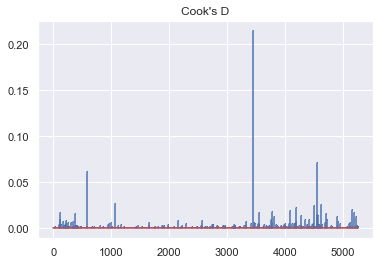

In [118]:
#Use statsmodels on ENTIRE dataset to identify influence points for revenue
import statsmodels.api as sm

sm_y = np.asarray(y_revenue).astype(float)
sm_X = np.asarray(X_revenue).astype(float)
sm_X = sm.add_constant(sm_X)
model = sm.OLS(sm_y,sm_X).fit()

#Get influence data
influence = model.get_influence()

#c is the cook's distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title('Cook\'s D')

From the plot of Cook's Distance, 1 point appears to have a much higher Cook's distance than the others. Plotting the influence plot was not possible due to an invalid value (probably a Nan). We can determine the index of the outlier and look for missing values in the array of Cook's distance.

In [119]:
#Look at DataFrame of Cook's Distance values to identify index of outliers.
c_df = pd.DataFrame(c)
print(c_df.sort_values(0,ascending=False).head())
print(c_df.sort_values(0,ascending=False).tail())

             0
3442  0.214705
4564  0.070949
584   0.060978
1068  0.026291
4631  0.025459
                 0
3637  2.257545e-11
3719  1.172467e-11
971   6.996232e-12
2452  4.562852e-13
3133           NaN


Index 3442 (Avatar) is identified as the outlier and Index 3133 (Doctor Who) is the movie with a resulting Cook's Distance of NaN.

In [120]:
#Drop 3133 and 3442 from the dataframe. Also drop 'tv_movie' as a column because Index 3133 was the only 
#tv_movie so the column is now not adding any additional information. This might also be the reason for the Nan Cook's
#D value.
X_dropped = X_revenue.drop([3442,3133]).drop(['tv_movie'],axis=1)
y_rev_dropped = y_revenue.drop([3442,3133])

### Revenue: Re-run linear regression, gradient boosting and random forest without outliers.

In [121]:
#Split data into training and testing set
X_train_rev_dropped,X_test_rev_dropped,y_train_rev_dropped,y_test_rev_dropped = train_test_split(X_dropped,
                                                                         y_rev_dropped,test_size=0.3,random_state=42)

#### Revenue: Linear Regression without Outliers

In [122]:
#Initialize Linear Regression
lin_reg = LinearRegression()

#Cross-validate on training set
cv_R2 = cross_val_score(lin_reg,X_train_rev_dropped,y_train_rev_dropped,cv=5,scoring='r2')
cv_RMSE = cross_val_score(lin_reg,X_train_rev_dropped,y_train_rev_dropped,cv=5,
                          scoring='neg_mean_squared_error')

#Fit model to training set and predict on test set
lin_reg.fit(X_train_rev_dropped,y_train_rev_dropped)
y_pred = lin_reg.predict(X_test_rev_dropped)

print('Cross-Validated Training R2:', np.mean(cv_R2))
print('Test R2:', lin_reg.score(X_test_rev_dropped,y_test_rev_dropped))
print('Cross-Validated Training RMSE:', format(-np.mean(cv_RMSE),'e'))
print('Test RMSE:',format(np.sqrt(mean_squared_error(y_test_rev_dropped,y_pred)),'e'))
print(pd.DataFrame({'Coefficients':lin_reg.coef_},index=X_train_rev_dropped.columns).sort_values(by='Coefficients',
                                                                                           ascending=False).head(5))

Cross-Validated Training R2: 0.7430533692354464
Test R2: 0.7351381313341564
Cross-Validated Training RMSE: 6.841533e+15
Test RMSE: 8.380522e+07
                   Coefficients
vote_count         9.253452e+08
budget             5.868043e+08
runtime            8.729220e+07
collection_or_not  5.378807e+07
animation          3.076863e+07


#### Revenue: Gradient Boosting Regression without outliers

In [123]:
#Initialize GradientBoostingRegressor
gb_rev = GradientBoostingRegressor()

#Cross-validate on training set
cv_R2 = cross_val_score(gb_rev,X_train_rev_dropped,y_train_rev_dropped,cv=5)
cv_RMSE = cross_val_score(gb_rev,X_train_rev_dropped,y_train_rev_dropped,cv=5,scoring='neg_mean_squared_error')

#Fit model to training set and predict on test set
gb_rev.fit(X_train_rev_dropped,y_train_rev_dropped)
y_pred = gb_rev.predict(X_test_rev_dropped)

print('Cross-Validated Training R2:', np.mean(cv_R2))
print('Test R2:', gb_rev.score(X_test_rev_dropped,y_test_rev_dropped))
print('Cross-Validated Training RMSE:', format(-np.mean(cv_RMSE),'e'))
print('Test RMSE:', format(np.sqrt(mean_squared_error(y_test_rev_dropped,y_pred)),'e'))

feature_importances_gb = pd.DataFrame(gb_rev.feature_importances_,
                                   index = X_train_rev_dropped.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances_gb.head(5))

Cross-Validated Training R2: 0.7771581819744829
Test R2: 0.7741323209656549
Cross-Validated Training RMSE: 5.990899e+15
Test RMSE: 7.739063e+07
                   importance
vote_count           0.609535
budget               0.273104
collection_or_not    0.036543
family               0.025458
runtime              0.019391


#### Revenue: Random Forest without outliers

In [124]:
#Initialize RandomForestRegressor
rf_rev = RandomForestRegressor(n_estimators=100)

#Cross-validate on training set
cv_R2 = cross_val_score(rf_rev,X_train_rev_dropped,y_train_rev_dropped,cv=5)
cv_RMSE = cross_val_score(rf_rev,X_train_rev_dropped,y_train_rev_dropped,cv=5,scoring='neg_mean_squared_error')

#Fit model to training set and predict on test set
rf_rev.fit(X_train_rev_dropped,y_train_rev_dropped)
y_pred = rf_rev.predict(X_test_rev_dropped)

print('Cross-Validated Training R2:', np.mean(cv_R2))
print('Test R2:', rf_rev.score(X_test_rev_dropped,y_test_rev_dropped))
print('Cross-Validated Training RMSE:', format(-np.mean(cv_RMSE),'e'))
print('Test RMSE:', format(np.sqrt(mean_squared_error(y_test_rev_dropped,y_pred)),'e'))

feature_importances_rf = pd.DataFrame(rf_rev.feature_importances_,
                                   index = X_train_rev_dropped.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances_rf.head(5))

Cross-Validated Training R2: 0.7829488588006358
Test R2: 0.7641723029925214
Cross-Validated Training RMSE: 5.756463e+15
Test RMSE: 7.907856e+07
                   importance
vote_count           0.583993
budget               0.247608
runtime              0.048021
collection_or_not    0.022778
family               0.013603


Without outliers, Random Forest and Gradient Boosting appear to perform better than linear regression, with RF having a slightly higher cross-validated training R2 value and lower cross-validated RMSE value. It should be noted that while Random Forest consistently has a higher R2 value, the RMSE values for both models fluctuate slightly based on the run. Both models are, therefore, likely comparable in terms of predictive capability. 

Based on the consistently higher R2 value, the Random Forest model is chosen for further feature selection and hyperparameter tuning.

### Revenue: Feature Selection in Random Forest Model

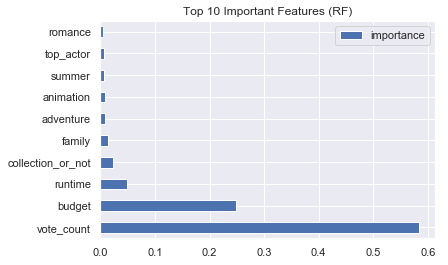

In [125]:
#Plot the features based on importance determined by RF
feature_importances_rf.head(10).plot(kind='barh',title='Top 10 Important Features (RF)')

The 2 most important features identified by the Random Forest model are vote_count and budget, followed by a severe drop in Gini importance. The correlation matrix identified vote_count, budget, runtime, and vote_average as the top 3 features linearly correlated with revenue. Given the feature importance plot above, how would the Random Forest model perform with just the top 3 features?

#### Revenue: Random Forest with just top 3 features (vote_count, budget, runtime)

In [126]:
X_train_select = X_train_rev_dropped[['vote_count','budget','runtime']]
X_test_select = X_test_rev_dropped[['vote_count','budget','runtime',]]

#Initialize RandomForestRegressor
rf_rev = RandomForestRegressor(n_estimators=100)

#Cross-validate on training set
cv_R2 = cross_val_score(rf_rev,X_train_select,y_train_rev_dropped,cv=5)
cv_RMSE = cross_val_score(rf_rev,X_train_select,y_train_rev_dropped,cv=5,scoring='neg_mean_squared_error')

#Fit model to training set and predict on test set
rf_rev.fit(X_train_select,y_train_rev_dropped)
y_pred = rf_rev.predict(X_test_select)

print('Cross-Validated Training R2:', np.mean(cv_R2))
print('Test R2:', rf_rev.score(X_test_select,y_test_rev_dropped))
print('Cross-Validated Training RMSE:', format(-np.mean(cv_RMSE),'e'))
print('Test RMSE:', format(np.sqrt(mean_squared_error(y_test_rev_dropped,y_pred)),'e'))

Cross-Validated Training R2: 0.7293031833874302
Test R2: 0.7210328466942397
Cross-Validated Training RMSE: 7.183379e+15
Test RMSE: 8.600781e+07


Only utilizing the top 3 important features reduces the training R2 from ~0.78 to ~0.73 and increases the training RMSE from ~5.8e15 to ~7e15. Note that the exact values are dependent on the run. This drop in metrics indicates that while the top 3 features explain a lot of the variance in revenue, the other features do have a weaker relationship with revenue and including them improves the performance of our model. This shows that just looking at correlation matrices to determine feature importance is not best practice as correlation matrices only look at linear relationships between independent and dependent variables whereas non-linear models such as Random Forest can determine non-linear relationships that may be impactful as well.

The Random Forest feature importances plot also shows that top_actor and top_director are less important features. What if we drop top_actor, top_director, or both and keep all the other features?

#### Revenue: Random Forest without top_actor

In [127]:
X_train_select = X_train_rev_dropped.drop(['top_actor'],axis=1)
X_test_select = X_test_rev_dropped.drop(['top_actor'],axis=1)

#Initialize RandomForestRegressor
rf_rev = RandomForestRegressor(n_estimators=100)

#Cross-validate on training set
cv_R2 = cross_val_score(rf_rev,X_train_select,y_train_rev_dropped,cv=5)
cv_RMSE = cross_val_score(rf_rev,X_train_select,y_train_rev_dropped,cv=5,scoring='neg_mean_squared_error')

#Fit model to training set and predict on test set
rf_rev.fit(X_train_select,y_train_rev_dropped)
y_pred = rf_rev.predict(X_test_select)

print('Cross-Validated Training R2:', np.mean(cv_R2))
print('Test R2:', rf_rev.score(X_test_select,y_test_rev_dropped))
print('Cross-Validated Training RMSE:', format(-np.mean(cv_RMSE),'e'))
print('Test RMSE:', format(np.sqrt(mean_squared_error(y_test_rev_dropped,y_pred)),'e'))

Cross-Validated Training R2: 0.7807476007140345
Test R2: 0.7672216358114822
Cross-Validated Training RMSE: 5.878570e+15
Test RMSE: 7.856564e+07


#### Revenue: Random Forest without top_actor and top_director

In [358]:
X_train_select = X_train_rev_dropped.drop(['top_actor','top_director'],axis=1)
X_test_select = X_test_rev_dropped.drop(['top_actor','top_director'],axis=1)

#Initialize RandomForestRegressor
rf_rev = RandomForestRegressor(n_estimators=100)

#Cross-validate on training set
cv_R2 = cross_val_score(rf_rev,X_train_select,y_train_rev_dropped,cv=5)
cv_RMSE = cross_val_score(rf_rev,X_train_select,y_train_rev_dropped,cv=5,scoring='neg_mean_squared_error')

#Fit model to training set and predict on test set
rf_rev.fit(X_train_select,y_train_rev_dropped)
y_pred = rf_rev.predict(X_test_select)

print('Cross-Validated Training R2:', np.mean(cv_R2))
print('Test R2:', rf_rev.score(X_test_select,y_test_rev_dropped))
print('Cross-Validated Training RMSE:', format(-np.mean(cv_RMSE),'e'))
print('Test RMSE:', format(np.sqrt(mean_squared_error(y_test_rev_dropped,y_pred)),'e'))

Cross-Validated Training R2: 0.7810003941300867
Test R2: 0.7690286117115972
Cross-Validated Training RMSE: 5.835021e+15
Test RMSE: 7.826011e+07


Dropping both top_actor and top_director does not have a significant impact on the RF model R2 values but the training RMSE does appear to increase slightly. All R2 and RMSE values are cross-validated. Since removing them does not significantly improve the model, we will retain these features in our final model.

### Revenue: Tune hyperparameters for final Random Forest Model

Use RandomizedSearchCV to narrow down search parameters

In [231]:
X_train_select = X_train_rev_dropped
X_test_select = X_test_rev_dropped

#Initialize RandomForestRegressor
rf_reg = RandomForestRegressor()

#Hyperparameters to tune
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 10)]
#Maximum number of features in tree
max_features = ['sqrt','auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

#Range of k-values for RandomizedSearchCV
param_grid = {'n_estimators': n_estimators,
              'max_features':max_features,
              'max_depth': max_depth}

#Cross-validate on training set
rf_reg_rev = RandomizedSearchCV(rf_reg,param_grid,cv=5)

#Fit model to training set and predict on test set
rf_reg_rev.fit(X_train_select,y_train_rev_dropped)
y_pred = rf_reg_rev.predict(X_test_select)

print('Training R2:', rf_reg_rev.best_score_)
print('Best parameters for model:', rf_reg_rev.best_params_)
print('Test R2:', rf_reg_rev.score(X_test_select,y_test_rev_dropped))

Training R2: 0.7949771508665833
Best parameters for model: {'n_estimators': 1888, 'max_features': 'sqrt', 'max_depth': 20}
Test R2: 0.7471127520575105


### Predicting Ratio using Regression

### Identifying Outliers and High Influence Points on ROI

Since ROI had the most extreme outliers, identifying outliers and removing high influence points will likely lead to better and more accurate predictions.

In [130]:
#Set x variables and y variable
X_ratio = reg_df_scaled.drop(['revenue','success_cat','roi','budget'],axis=1)
y_ratio = reg_df_scaled['roi']

Text(0.5,1,"Cook's D")

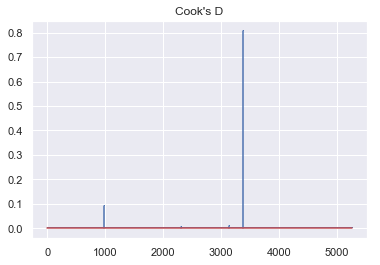

In [131]:
#Use statsmodels on ENTIRE dataset to identify influence points
sm_y = np.asarray(y_ratio).astype(float)
sm_X = np.asarray(X_ratio).astype(float)
sm_X = sm.add_constant(sm_X)
model = sm.OLS(sm_y,sm_X).fit()

#Get influence data
influence = model.get_influence()

#c is the cook's distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title('Cook\'s D')

From the plot of Cook's Distance, there appear to be 2 points that have a much higher Cook's distance than the others. Plotting the influence plot was not possible due to an invalid value (probably a Nan). We can determine the index of the outliers and look for missing values in the array of Cook's distance.

In [132]:
c_df = pd.DataFrame(c)
print(c_df.sort_values(0,ascending=False).head())
print(c_df.sort_values(0,ascending=False).tail())

             0
3383  0.807380
979   0.090063
3133  0.011536
2305  0.006011
1529  0.001491
                 0
1720  9.953661e-13
1597  7.761199e-13
4773  5.299191e-13
1911  4.394737e-13
4387  3.928994e-13


Index 3383 and 979 (Paranormal Activity and Blair Witch's Project, respectively) have the highest Cook's distances. These were also the points identified as outliers in the ROI boxplot. These 3 points will be removed from the analysis.

### ROI: Drop outliers and split data into training and test set

In [133]:
#Set x variables and y variable. Drop tv_movie column because Doctor Who (3133) was the only tv_movie in the dataset.
X_ratio_dropped = X_ratio.drop([3133,3383,979]).drop(['tv_movie'],axis=1)
y_ratio_dropped = y_ratio.drop([3133,3383,979])

In [134]:
#Split data into training and testing set
X_train_roi,X_test_roi,y_train_roi,y_test_roi = train_test_split(X_ratio_dropped,y_ratio_dropped,
                                                                 test_size=0.3,random_state=42)

### ROI: Model Development

#### ROI: Linear Regression (Scikit-Learn and Statsmodels)

In [263]:
#Initialize Linear Regression
lin_reg = LinearRegression()

#Cross-validate on training set
cv_R2 = cross_val_score(lin_reg,X_train_roi,y_train_roi,cv=5,scoring='r2')
cv_RMSE = cross_val_score(lin_reg,X_train_roi,y_train_roi,cv=5,scoring='neg_mean_squared_error')

#Fit model to training set and predict on test set
lin_reg.fit(X_train_roi,y_train_roi)
y_pred = lin_reg.predict(X_test_roi)

print('Training R2:', np.mean(cv_R2))
print('Test R2:', lin_reg.score(X_test_roi,y_test_roi))
print('Training RMSE:', -np.mean(cv_RMSE))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test_roi,y_pred)))
print(pd.DataFrame({'Coefficients':lin_reg.coef_},index=X_train_roi.columns).sort_values(by='Coefficients',
                                                                                           ascending=False).head())

Training R2: 0.00552616355097213
Test R2: 0.027052666948578996
Training RMSE: 411.5860967422732
Test RMSE: 21.910726298916256
                   Coefficients
vote_count            12.373658
documentary            3.616838
collection_or_not      3.609523
horror                 3.543667
summer                 1.081200


In [136]:
df = X_train_roi.join(y_train_roi)
features = '+'.join(X_train_roi.columns)
model = smf.ols(formula='roi ~ ' + features, data=df)
results = model.fit()
results_df = results.pvalues.to_frame()
results_df.columns = ['p-value']
results_df['Coefficient'] = results.params
results_df[results_df['p-value']<0.05].sort_values('Coefficient',ascending=False)

,p-value,Coefficient
vote_count,4.010111e-03,12.373658
Intercept,1.893805e-07,9.673624
collection_or_not[T.1],4.296736e-05,3.609523
horror[T.1],4.292961e-03,3.543667
top_actor[T.1],3.683868e-02,-2.212816
comedy[T.1],6.859989e-03,-2.347659
science_fiction[T.1],1.640227e-02,-2.707022
runtime,1.360608e-02,-14.419102


The training R2 value is extremely low (~0) and the RMSE is fairly high at 407. The values also fluctuate significantly based on the random_state variable used to split the training and test data. Since the distribution of ROI is highly skewed, log-transformation of the target variable could result in better predictions.

#### ROI: Log Transformation of ROI

In [137]:
#Log transformation of the target variable in the training and test set
y_train_roi_log = np.log(y_train_roi)
y_test_roi_log = np.log(y_test_roi)

#### ROI: Linear Regression after log transformation of target

In [138]:
#Initialize Linear Regression
lin_reg = LinearRegression()

#Cross-validate on training set
cv_R2 = cross_val_score(lin_reg,X_train_roi,y_train_roi_log,cv=5,scoring='r2')
cv_RMSE = cross_val_score(lin_reg,X_train_roi,y_train_roi_log,cv=5,scoring='neg_mean_squared_error')

#Fit model to training set and predict on test set
lin_reg.fit(X_train_roi,y_train_roi_log)
y_pred = lin_reg.predict(X_test_roi)

print('Training R2 for log ROI:', np.mean(cv_R2))
print('Test R2 for log ROI:', lin_reg.score(X_test_roi,y_test_roi_log))
print('Training RMSE:', -np.mean(cv_RMSE))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test_roi_log,y_pred)))

Training R2 for log ROI: 0.1327839536430945
Test R2 for log ROI: 0.14206345682355115
Training RMSE: 2.3873497565831663
Test RMSE: 1.521275603720474


In [139]:
#Using statsmodels
df = X_train_roi.join(y_train_roi_log)
features = '+'.join(X_train_roi.columns)
model = smf.ols(formula='roi ~ ' + features, data=df)

#Fit model
results = model.fit()

#Save coefficients and p-values in dataframe
results_df = results.pvalues.to_frame()
results_df.columns = ['p-value']
results_df['Coefficient'] = results.params

#Print significant coefficients
results_df[results_df['p-value']<0.05].sort_values('Coefficient',ascending=False)

,p-value,Coefficient
vote_count,3.329324e-37,4.208542
runtime,2.719060e-04,1.617219
collection_or_not[T.1],1.382349e-33,0.816894
horror[T.1],1.669990e-03,0.296393
romance[T.1],1.108826e-03,0.233455
holiday_season[T.1],2.087523e-03,0.233238
summer[T.1],1.350536e-02,0.156944
drama[T.1],3.009840e-02,-0.139072
fantasy[T.1],1.673785e-03,-0.295073
science_fiction[T.1],3.894025e-04,-0.304148


The Training and Testing R2 values have improved significantly after the log transformation and are now much less dependent on the random_state. R2 is still low (~0.13) but the model appears to be stable. Also note the low training RMSE value.

#### log(ROI): Random Forest

In [140]:
#Initialize RandomForestRegressor
rf_roi = RandomForestRegressor(n_estimators=100)

#Cross-validate on training set
cv_R2 = cross_val_score(rf_roi, X_train_roi, y_train_roi_log,cv=5)
cv_RMSE = cross_val_score(rf_roi ,X_train_roi, y_train_roi_log,cv=5,scoring='neg_mean_squared_error')

#Fit model to training set and predict on test set
rf_roi.fit(X_train_roi,y_train_roi_log)
y_pred = rf_roi.predict(X_test_roi)

print('Cross-Validated Training R2:', np.mean(cv_R2))
print('Test R2:', rf_roi.score(X_test_roi,y_test_roi_log))
print('Cross-Validated Training RMSE:', -np.mean(cv_RMSE))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test_roi_log,y_pred)))

feature_importances_rf_roi = pd.DataFrame(rf_roi.feature_importances_,
                                   index = X_train_roi.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances_rf_roi)

Cross-Validated Training R2: 0.13290323832642612
Test R2: 0.14155124807003094
Cross-Validated Training RMSE: 2.377040610990558
Test RMSE: 1.521729655025179
                   importance
vote_count           0.385288
runtime              0.214179
collection_or_not    0.040918
drama                0.027025
action               0.025368
comedy               0.024391
romance              0.023313
summer               0.022913
thriller             0.020900
horror               0.018802
crime                0.017710
holiday_season       0.016649
science_fiction      0.016534
top_actor            0.014667
adventure            0.014011
fantasy              0.013627
mystery              0.013160
labor_day            0.012717
valentines_day       0.010310
war                  0.009512
history              0.008566
family               0.007963
mlk_day              0.007859
music                0.007278
western              0.006541
documentary          0.005742
top_director         0.005403
anim

#### log(ROI): Decision Tree

In [141]:
#Initialize DecisionTreeRegressor
dt_roi = DecisionTreeRegressor()

#Range of k-values for GridSearchCV
param = {'max_depth': range(1,110)}

#Cross-validate on training set
dt_roi = GridSearchCV(dt_roi,param,cv=5,scoring=['r2','neg_mean_squared_error'],refit='r2')

#Fit model to training set and predict on test set
dt_roi.fit(X_train_roi,y_train_roi_log)
y_pred = dt_roi.predict(X_test_roi)

print('Training Best R2:', dt_roi.best_score_)
print('Training Best Max Depth:', dt_roi.best_params_)
print('Test R2:', dt_roi.score(X_test_roi,y_test_roi_log))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test_roi_log,y_pred)))

Training Best R2: 0.17750317805955915
Training Best Max Depth: {'max_depth': 4}
Test R2: 0.15251455577924167
Test RMSE: 1.5119813742859443


In [142]:
print('Training Best RMSE:', -dt_roi.cv_results_['mean_test_neg_mean_squared_error'][3])

Training Best RMSE: 2.262167494946981


#### log(ROI): kNN Regression

In [143]:
#Initialize KNNRegressor
knn = KNeighborsRegressor()

#Range of k-values for GridSearchCV
param = {'n_neighbors': range(1,31)}

#Cross-validate on training set
knn_roi = GridSearchCV(knn,param,cv=5,scoring=['r2','neg_mean_squared_error'],refit='r2')

#Fit model to training set and predict on test set
knn_roi.fit(X_train_roi,y_train_roi_log)
y_pred = knn_roi.predict(X_test_roi)

print('Training Best Score:', knn_roi.best_score_)
print('Training Best k:', knn_roi.best_params_)
print('Test R2:', knn_roi.score(X_test_roi,y_test_roi_log))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test_roi_log,y_pred)))

Training Best Score: 0.11918124401056218
Training Best k: {'n_neighbors': 30}
Test R2: 0.12137558470745147
Test RMSE: 1.5395080033267645


In [144]:
print('Training Best RMSE:', -knn_roi.cv_results_['mean_test_neg_mean_squared_error'][29])

Training Best RMSE: 2.423364480270715


#### log(ROI): Gradient Boosting

In [145]:
#Initialize GradientBoostingRegressor
gb_roi = GradientBoostingRegressor()

#Cross-validate on training set
cv_R2 = cross_val_score(gb_roi,X_train_roi,y_train_roi_log,cv=5)
cv_RMSE = cross_val_score(gb_roi,X_train_roi,y_train_roi_log,cv=5,scoring='neg_mean_squared_error')

#Fit model to training set and predict on test set
gb_roi.fit(X_train_roi,y_train_roi_log)
y_pred = gb_roi.predict(X_test_roi)

print('Cross-Validated Training R2:', np.mean(cv_R2))
print('Test R2:', gb_roi.score(X_test_roi,y_test_roi_log))
print('Cross-Validated Training RMSE:', -np.mean(cv_RMSE))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test_roi_log,y_pred)))

feature_importances_gb_roi = pd.DataFrame(gb_roi.feature_importances_,
                                   index = X_train_roi.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

Cross-Validated Training R2: 0.20167072644391065
Test R2: 0.19329252734759572
Cross-Validated Training RMSE: 2.1918431998947896
Test RMSE: 1.475157383211849


Gradient Boosting outperforms all other models based on the cross-validated training R2 and cross-validated training RMSE. This model is selected for further feature selection and hyperparameter tuning.

### ROI: Feature Selection in Gradient Boosting

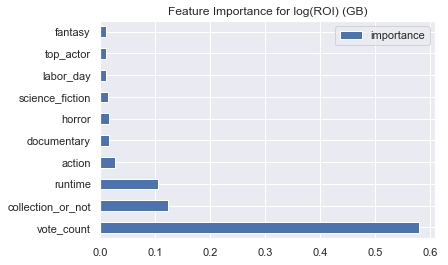

In [146]:
#Plot of feature importance
feature_importances_gb_roi.head(10).plot(kind='barh',title = 'Feature Importance for log(ROI) (GB)')

Since top_director is identified as pretty unimportant important feature by the Gradient Boosting model, we can test how the model will respond to the removal of this feature.

#### Removing top_director

In [147]:
#Drop top_director from X
X_train_select_roi = X_train_roi.drop(['top_director'],axis=1)
X_test_select_roi = X_test_roi.drop(['top_director'],axis=1)

#Initialize GradientBoostingRegressor
gb_roi = GradientBoostingRegressor()

#Cross-validate on training set
cv_R2 = cross_val_score(gb_roi,X_train_select_roi,y_train_roi_log,cv=5)
cv_RMSE = cross_val_score(gb_roi,X_train_select_roi,y_train_roi_log,cv=5,scoring='neg_mean_squared_error')

#Fit model to training set and predict on test set
gb_roi.fit(X_train_select_roi,y_train_roi_log)
y_pred = gb_roi.predict(X_test_select_roi)

print('Cross-Validated Training R2:', np.mean(cv_R2))
print('Test R2:', gb_roi.score(X_test_select_roi,y_test_roi_log))
print('Cross-Validated Training RMSE:', -np.mean(cv_RMSE))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test_roi_log,y_pred)))

Cross-Validated Training R2: 0.19810260415510722
Test R2: 0.1968441362341964
Cross-Validated Training RMSE: 2.204834565550869
Test RMSE: 1.4719065385863734


Removing top_director as a feature results in a slightly worse training R2 and RMSE values. Since the R2 value is already quite low, we will not drop any features whose removal further negatively affects the performance of the model. What if we remove top_actor?

#### Removing top_actor

In [148]:
#Drop top_actor from X
X_train_select_roi = X_train_roi.drop(['top_actor'],axis=1)
X_test_select_roi = X_test_roi.drop(['top_actor'],axis=1)

#Initialize GradientBoostingRegressor
gb_roi = GradientBoostingRegressor()

#Cross-validate on training set
cv_R2 = cross_val_score(gb_roi,X_train_select_roi,y_train_roi_log,cv=5)
cv_RMSE = cross_val_score(gb_roi,X_train_select_roi,y_train_roi_log,cv=5,scoring='neg_mean_squared_error')

#Fit model to training set and predict on test set
gb_roi.fit(X_train_select_roi,y_train_roi_log)
y_pred = gb_roi.predict(X_test_select_roi)

print('Cross-Validated Training R2:', np.mean(cv_R2))
print('Test R2:', gb_roi.score(X_test_select_roi,y_test_roi_log))
print('Cross-Validated Training RMSE:', -np.mean(cv_RMSE))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test_roi_log,y_pred)))

Cross-Validated Training R2: 0.19943562995520595
Test R2: 0.19618147382517903
Cross-Validated Training RMSE: 2.2019256452734113
Test RMSE: 1.4725136287355374


Removing top_actor also seems to negatively affect model performance with the training R2 decreasing slightly and the training RMSE increasing slightly. Therefore, we will keep all the features in our final model for hyperparameter tuning.

### ROI: Tune hyperparameters for gradient boosting model

In [171]:
#Initialize GradientBoostingRegressor
gb_roi = GradientBoostingRegressor()

#Hyperparameters to tune
#Number of trees in random forest
n_estimators = [100,250,500,750,1000,1250,1500,1750]
#Maximum number of features in tree
learning_rate = [0.15,0.1,0.05,0.01,0.005,0.001]
# Maximum number of levels in tree
max_depth = [2,3,4,5,6,7]

#Range of k-values for RandomizedSearchCV
param_grid = {'n_estimators': n_estimators,
              'learning_rate': learning_rate,
              'max_depth': max_depth}

#Cross-validate on training set
gb_roi_cv = RandomizedSearchCV(gb_roi,param_grid,cv=5,scoring='r2')

#Fit model to training set and predict on test set
gb_roi_cv.fit(X_train_roi,y_train_roi_log)
y_pred = gb_roi_cv.predict(X_test_roi)

print('Best Training R2:', gb_roi_cv.best_score_)
print('Best parameters for model:', gb_roi_cv.best_params_)
print('Test R2:', gb_roi_cv.score(X_test_roi,y_test_roi_log))

Best Training R2: 0.2080263507854869
Best parameters for model: {'n_estimators': 1750, 'max_depth': 2, 'learning_rate': 0.005}
Test R2: 0.19004411078986494


### Predicting Categorical Success (Classification)

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

#### Success: Outlier and High Influence Point Analysis

In [151]:
#Set x variables and y variable. Drop 'tv_movie' column because it only has 1 movie: Doctor Who
X_success = reg_df_scaled.drop(['revenue','success_cat','budget','roi','tv_movie'],axis=1).drop([3133])
y_success = reg_df_scaled['success_cat'].drop([3133]).apply(lambda x: x.replace(' ',''))

Text(0.5,1,"Cook's D")

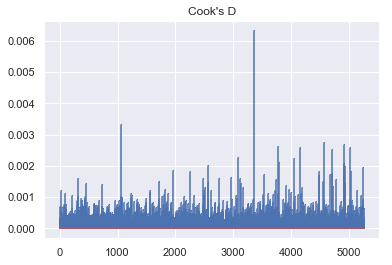

In [152]:
#Use statsmodels on ENTIRE dataset to identify influence points
labelencoder = LabelEncoder()
y_success_num = labelencoder.fit_transform(y_success)

sm_y = np.asarray(y_success_num).astype(float)
sm_X = np.asarray(X_success).astype(float)
sm_X = sm.add_constant(sm_X)
model = sm.OLS(sm_y,sm_X).fit()

#Get influence data
influence = model.get_influence()

#c is the cook's distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title('Cook\'s D')

Looking at the y-scale of the plot of Cook's Distance, there don't appear to be an significant outliers.

#### Success: Split data into training and test set

In [153]:
#Split data into training and testing set
X_train_success,X_test_success,y_train_success,y_test_success = train_test_split(X_success,y_success,
                                                                                 test_size=0.3,random_state=42)

#### Success: kNN Classifier

In [154]:
#Initialize KNNClassifier
knn = KNeighborsClassifier()

#Range of k-values for GridSearchCV
param = {'n_neighbors': range(1,31)}

#Cross-validate on training set
knn_clf = GridSearchCV(knn,param,cv=5)

#Fit model to training set and predict on test set
knn_clf.fit(X_train_success,y_train_success)
y_pred = knn_clf.predict(X_test_success)

print('Training Best Accuracy:', knn_clf.best_score_)
print('Training Best k:', knn_clf.best_params_)
print('Test Accuracy:', knn_clf.score(X_test_success,y_test_success))
print('Confusion Matrix',pd.DataFrame(confusion_matrix(y_test_success,y_pred),
                                      columns=['Predicted BreakEven','Predicted Flop','Predicted Hit'],
             index=['Actual BreakEven','Actual Flop','Actual Hit']))
print('Classification Report',classification_report(y_test_success,y_pred))

Training Best Accuracy: 0.46849538294405213
Training Best k: {'n_neighbors': 19}
Test Accuracy: 0.4813172894236859
Confusion Matrix                   Predicted BreakEven  Predicted Flop  Predicted Hit
Actual BreakEven                  221             209            101
Actual Flop                       155             360             33
Actual Hit                        169             152            179
Classification Report               precision    recall  f1-score   support

   BreakEven       0.41      0.42      0.41       531
        Flop       0.50      0.66      0.57       548
         Hit       0.57      0.36      0.44       500

   micro avg       0.48      0.48      0.48      1579
   macro avg       0.49      0.48      0.47      1579
weighted avg       0.49      0.48      0.47      1579



#### Success: Logistic Regression

In [155]:
#Initialize
log_reg = LogisticRegression(solver='newton-cg',multi_class='multinomial')

#Range of C values
param = {'C': np.linspace(1,1e5,50)}

#Cross-validate on training set
log_reg_grid = GridSearchCV(log_reg,param,cv=5)

#Fit model to training set and predict on test set
log_reg_grid.fit(X_train_success,y_train_success)
y_pred = log_reg_grid.predict(X_test_success)

print('Training Accuracy:', log_reg_grid.best_score_)
print('Training Parameters:', log_reg_grid.best_params_)
print('Test Accuracy:', log_reg_grid.score(X_test_success,y_test_success))
print('Confusion Matrix',pd.DataFrame(confusion_matrix(y_test_success,y_pred),
                                      columns=['Predicted BreakEven','Predicted Flop','Predicted Hit'],
                                      index=['Actual BreakEven','Actual Flop','Actual Hit']))
print('Classification Report',classification_report(y_test_success,y_pred))

Training Accuracy: 0.5353068984247692
Training Parameters: {'C': 2041.795918367347}
Test Accuracy: 0.5167827739075365
Confusion Matrix                   Predicted BreakEven  Predicted Flop  Predicted Hit
Actual BreakEven                  196             221            114
Actual Flop                        98             419             31
Actual Hit                        160             139            201
Classification Report               precision    recall  f1-score   support

   BreakEven       0.43      0.37      0.40       531
        Flop       0.54      0.76      0.63       548
         Hit       0.58      0.40      0.48       500

   micro avg       0.52      0.52      0.52      1579
   macro avg       0.52      0.51      0.50      1579
weighted avg       0.52      0.52      0.50      1579



In [156]:
pd.DataFrame(log_reg_grid.best_estimator_.coef_,index=['Breakeven','Flop','Hit'],columns=X_train_success.columns)

,runtime,vote_count,action,adventure,animation,comedy,crime,documentary,drama,family,...,war,western,top_actor,top_director,collection_or_not,holiday_season,labor_day,mlk_day,summer,valentines_day
Breakeven,1.435366,6.327867,0.168900,-0.001423,-0.155689,0.006392,0.228083,-0.316592,-0.238529,0.291802,...,0.041161,-0.277044,0.167586,-0.019467,-0.010375,0.020367,-0.092626,-0.248917,0.097376,0.049218
Flop,-1.858370,-17.890365,0.114991,0.148166,0.173147,-0.095101,-0.022522,-0.542988,0.110432,-0.249586,...,-0.089284,0.258741,0.154877,-0.009219,-0.888797,-0.200801,0.342661,0.250316,-0.276493,0.054149
Hit,0.423004,11.562497,-0.283891,-0.146742,-0.017458,0.088709,-0.205561,0.859580,0.128097,-0.042216,...,0.048123,0.018303,-0.322463,0.028686,0.899171,0.180435,-0.250036,-0.001399,0.179117,-0.103367


#### Success: Random Forest Classifier

In [157]:
#Initialize RandomForestRegressor
rf_clf = RandomForestClassifier(n_estimators=100)

#Cross-validate on training set
cv_accuracy = cross_val_score(rf_clf, X_train_success,y_train_success,cv=5,scoring='accuracy')

#Fit model to training set and predict on test set
rf_clf.fit(X_train_success,y_train_success)
y_pred = rf_clf.predict(X_test_success)

print('Cross-Validated Training Accuracy:', np.mean(cv_accuracy))
print('Test Accuracy:', rf_clf.score(X_test_success,y_test_success))
print('Confusion Matrix',pd.DataFrame(confusion_matrix(y_test_success,y_pred),
                                      columns=['Predicted BreakEven','Predicted Flop','Predicted Hit'],
                                      index=['Actual BreakEven','Actual Flop','Actual Hit']))
print('Classification Report',classification_report(y_test_success,y_pred))
feature_importances_clf = pd.DataFrame(rf_clf.feature_importances_,
                                   index = X_train_success.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

Cross-Validated Training Accuracy: 0.5086897608106516
Test Accuracy: 0.4908169727675744
Confusion Matrix                   Predicted BreakEven  Predicted Flop  Predicted Hit
Actual BreakEven                  203             185            143
Actual Flop                       140             349             59
Actual Hit                        162             115            223
Classification Report               precision    recall  f1-score   support

   BreakEven       0.40      0.38      0.39       531
        Flop       0.54      0.64      0.58       548
         Hit       0.52      0.45      0.48       500

   micro avg       0.49      0.49      0.49      1579
   macro avg       0.49      0.49      0.49      1579
weighted avg       0.49      0.49      0.49      1579



#### Success: SVM (Linear)

In [159]:
#Initialize linear kernel
svc = SVC(kernel='linear')

#Cross-validate
cv_accuracy = cross_val_score(svc, X_train_success,y_train_success,cv=5,scoring='accuracy')

#Fit model to training set and predict on test set
svc.fit(X_train_success,y_train_success)
y_pred = svc.predict(X_test_success)

print('Cross-Validated Training Accuracy:', np.mean(cv_accuracy))
print('Test Accuracy:', svc.score(X_test_success,y_test_success))
print('Confusion Matrix',pd.DataFrame(confusion_matrix(y_test_success,y_pred),
                                      columns=['Predicted BreakEven','Predicted Flop','Predicted Hit'],
                                      index=['Actual BreakEven','Actual Flop','Actual Hit']))
print('Classification Report',classification_report(y_test_success,y_pred))

Cross-Validated Training Accuracy: 0.49539589961117
Test Accuracy: 0.49525015832805575
Confusion Matrix                   Predicted BreakEven  Predicted Flop  Predicted Hit
Actual BreakEven                  141             278            112
Actual Flop                        72             440             36
Actual Hit                        112             187            201
Classification Report               precision    recall  f1-score   support

   BreakEven       0.43      0.27      0.33       531
        Flop       0.49      0.80      0.61       548
         Hit       0.58      0.40      0.47       500

   micro avg       0.50      0.50      0.50      1579
   macro avg       0.50      0.49      0.47      1579
weighted avg       0.50      0.50      0.47      1579



#### Success: SVM (Non-Linear)

In [160]:
#Initialize non-linear kernel
svc = SVC(kernel='rbf',gamma='scale')

#Cross-validate
cv_accuracy = cross_val_score(svc, X_train_success,y_train_success,cv=5,scoring='accuracy')

#Fit model to training set and predict on test set
svc.fit(X_train_success,y_train_success)
y_pred = svc.predict(X_test_success)

print('Cross-Validated Training Accuracy:', np.mean(cv_accuracy))
print('Test Accuracy:', svc.score(X_test_success,y_test_success))
print('Confusion Matrix',pd.DataFrame(confusion_matrix(y_test_success,y_pred),
                                      columns=['Predicted BreakEven','Predicted Flop','Predicted Hit'],
                                      index=['Actual BreakEven','Actual Flop','Actual Hit']))
print('Classification Report',classification_report(y_test_success,y_pred))

Cross-Validated Training Accuracy: 0.4704128372805467
Test Accuracy: 0.47181760607979734
Confusion Matrix                   Predicted BreakEven  Predicted Flop  Predicted Hit
Actual BreakEven                  138             291            102
Actual Flop                        86             426             36
Actual Hit                        110             209            181
Classification Report               precision    recall  f1-score   support

   BreakEven       0.41      0.26      0.32       531
        Flop       0.46      0.78      0.58       548
         Hit       0.57      0.36      0.44       500

   micro avg       0.47      0.47      0.47      1579
   macro avg       0.48      0.47      0.45      1579
weighted avg       0.48      0.47      0.45      1579



#### Success: Gradient Boosting Classifier

In [158]:
#Initialize GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

#Cross-validate on training set
cv_accuracy = cross_val_score(gb_clf,X_train_success,y_train_success,cv=5)

#Fit model to training set and predict on test set
gb_clf.fit(X_train_success,y_train_success)
y_pred = gb_clf.predict(X_test_success)

print('Training Accuracy:', np.mean(cv_accuracy))
print('Test Accuracy:', gb_clf.score(X_test_success,y_test_success))
print('Confusion Matrix',pd.DataFrame(confusion_matrix(y_test_success,y_pred),
                                      columns=['Predicted BreakEven','Predicted Flop','Predicted Hit'],
                                      index=['Actual BreakEven','Actual Flop','Actual Hit']))
print('Classification Report',classification_report(y_test_success,y_pred))
feature_importances_gb_clf = pd.DataFrame(gb_clf.feature_importances_,
                                   index = X_train_success.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

Training Accuracy: 0.5491604807352422
Test Accuracy: 0.5281823939202026
Confusion Matrix                   Predicted BreakEven  Predicted Flop  Predicted Hit
Actual BreakEven                  222             206            103
Actual Flop                       116             402             30
Actual Hit                        164             126            210
Classification Report               precision    recall  f1-score   support

   BreakEven       0.44      0.42      0.43       531
        Flop       0.55      0.73      0.63       548
         Hit       0.61      0.42      0.50       500

   micro avg       0.53      0.53      0.53      1579
   macro avg       0.53      0.52      0.52      1579
weighted avg       0.53      0.53      0.52      1579



Gradient Boosting appears to be the best performer in predicting categorical success (breakeven, flop, hit), in terms of overall accuracy, precision, and recall.

### Success: Feature Selection using Gini Importance

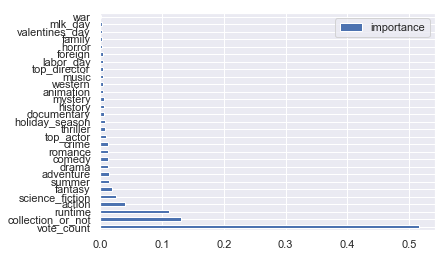

In [161]:
feature_importances_gb_clf.plot(kind='barh')

Vote_count is the most important feature, by far, based on the Gini Importance. top_director appears to be one of the least important features, and top_actor also appears to be less important.

#### Success: Gradient Boosting without top_director

In [162]:
X_select_train = X_train_success.drop(['top_director'],axis=1)
X_select_test = X_test_success.drop(['top_director'],axis=1)

#Initialize GradientBoostingRegressor
gb_clf = GradientBoostingClassifier()

#Cross-validate on training set
cv_accuracy = cross_val_score(gb_clf,X_select_train,y_train_success,cv=5)

#Fit model to training set and predict on test set
gb_clf.fit(X_select_train,y_train_success)
y_pred = gb_clf.predict(X_select_test)

print('Training Accuracy:', np.mean(cv_accuracy))
print('Test Accuracy:', gb_clf.score(X_select_test,y_test_success))
print('Confusion Matrix',pd.DataFrame(confusion_matrix(y_test_success,y_pred),
                                      columns=['Predicted BreakEven','Predicted Flop','Predicted Hit'],
                                      index=['Actual BreakEven','Actual Flop','Actual Hit']))
print('Classification Report',classification_report(y_test_success,y_pred))
feature_importances_gb_clf = pd.DataFrame(gb_clf.feature_importances_,
                                   index = X_select_test.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

Training Accuracy: 0.5448133910686933
Test Accuracy: 0.5231158961367954
Confusion Matrix                   Predicted BreakEven  Predicted Flop  Predicted Hit
Actual BreakEven                  219             210            102
Actual Flop                       116             399             33
Actual Hit                        167             125            208
Classification Report               precision    recall  f1-score   support

   BreakEven       0.44      0.41      0.42       531
        Flop       0.54      0.73      0.62       548
         Hit       0.61      0.42      0.49       500

   micro avg       0.52      0.52      0.52      1579
   macro avg       0.53      0.52      0.51      1579
weighted avg       0.53      0.52      0.51      1579



In [163]:
X_select_train = X_train_success.drop(['top_actor'],axis=1)
X_select_test = X_test_success.drop(['top_actor'],axis=1)

#Initialize GradientBoostingRegressor
gb_clf = GradientBoostingClassifier()

#Cross-validate on training set
cv_accuracy = cross_val_score(gb_clf,X_select_train,y_train_success,cv=5)

#Fit model to training set and predict on test set
gb_clf.fit(X_select_train,y_train_success)
y_pred = gb_clf.predict(X_select_test)

print('Training Accuracy:', np.mean(cv_accuracy))
print('Test Accuracy:', gb_clf.score(X_select_test,y_test_success))
print('Confusion Matrix',pd.DataFrame(confusion_matrix(y_test_success,y_pred),
                                      columns=['Predicted BreakEven','Predicted Flop','Predicted Hit'],
                                      index=['Actual BreakEven','Actual Flop','Actual Hit']))
print('Classification Report',classification_report(y_test_success,y_pred))
feature_importances_gb_clf = pd.DataFrame(gb_clf.feature_importances_,
                                   index = X_select_test.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

Training Accuracy: 0.5467177742429599
Test Accuracy: 0.5275490816972768
Confusion Matrix                   Predicted BreakEven  Predicted Flop  Predicted Hit
Actual BreakEven                  216             210            105
Actual Flop                       113             404             31
Actual Hit                        158             129            213
Classification Report               precision    recall  f1-score   support

   BreakEven       0.44      0.41      0.42       531
        Flop       0.54      0.74      0.63       548
         Hit       0.61      0.43      0.50       500

   micro avg       0.53      0.53      0.53      1579
   macro avg       0.53      0.52      0.52      1579
weighted avg       0.53      0.53      0.52      1579



Removing top_actor and top_director do not improve model performance (accuracy is slightly slower) and will therefore be retained in the final model, for hyperparameter tuning.

### Success: Tune hyperparameters for gradient boosting model

In [174]:
#Initialize GradientBoostingRegressor
gb_clf = GradientBoostingClassifier()

#Hyperparameters to tune
#Number of trees in random forest
n_estimators = [100,500,1000]
#Maximum number of features in tree
learning_rate = [0.15,0.1,0.05]
# Maximum number of levels in tree
max_depth = [3,10,20]

#Range of k-values for RandomizedSearchCV
param_grid = {'n_estimators': n_estimators,
              'learning_rate': learning_rate,
              'max_depth': max_depth}

#Cross-validate on training set
gb_clf_cv = RandomizedSearchCV(gb_clf,param_grid,cv=5)

#Fit model to training set and predict on test set
gb_clf_cv.fit(X_train_success,y_train_success)
y_pred = gb_clf_cv.predict(X_test_success)

print('Best Training Accuracy:', gb_clf_cv.best_score_)
print('Best parameters for model:', gb_clf_cv.best_params_)
print('Test Accuracy:', gb_clf_cv.score(X_test_success,y_test_success))

Best Training Accuracy: 0.548886474741988
Best parameters for model: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Test Accuracy: 0.5281823939202026


# Final Models Using Tuned Hyperparameters

## Final Model: Revenue

In [360]:
X_train_select = X_train_rev_dropped
X_test_select = X_test_rev_dropped

#Initialize RandomForestRegressor
rf_rev = RandomForestRegressor(n_estimators=1888, max_features='sqrt', max_depth = 20)

#Cross-validate on training set
cv_R2 = cross_val_score(rf_rev,X_train_select,y_train_rev_dropped,cv=5)
cv_RMSE = cross_val_score(rf_rev,X_train_select,y_train_rev_dropped,cv=5,scoring='neg_mean_squared_error')

#Fit model to training set and predict on test set
rf_rev.fit(X_train_select,y_train_rev_dropped)
y_pred = rf_rev.predict(X_test_select)

print('Cross-Validated Training R2:', np.mean(cv_R2))
print('Test R2:', rf_rev.score(X_test_select,y_test_rev_dropped))
print('Cross-Validated Training RMSE:', format(-np.mean(cv_RMSE),'e'))
print('Test RMSE:', format(np.sqrt(mean_squared_error(y_test_rev_dropped,y_pred)),'e'))

feature_importances_rf = pd.DataFrame(rf_rev.feature_importances_,
                                   index = X_test_select.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances_rf.head(5))

Cross-Validated Training R2: 0.7943409928840056
Test R2: 0.7454181885241155
Cross-Validated Training RMSE: 5.519012e+15
Test RMSE: 8.216276e+07
                   importance
vote_count           0.336600
budget               0.269568
runtime              0.082321
collection_or_not    0.060385
adventure            0.033420


### Model Explainability Example: What are the most influential features in predicting the revenue for Prometheus (2012)?

In [179]:
import shap
shap.initjs()

In [377]:
explainer_rev = shap.TreeExplainer(rf_rev)
shap_values_rev = explainer.shap_values(X_test_select)
shap.force_plot(explainer_rev.expected_value, 
                shap_values_rev[1,:], 
                X_test_select.iloc[1,:])

### Based on the average Shapley Values, what are the most influential features in the overall mode?

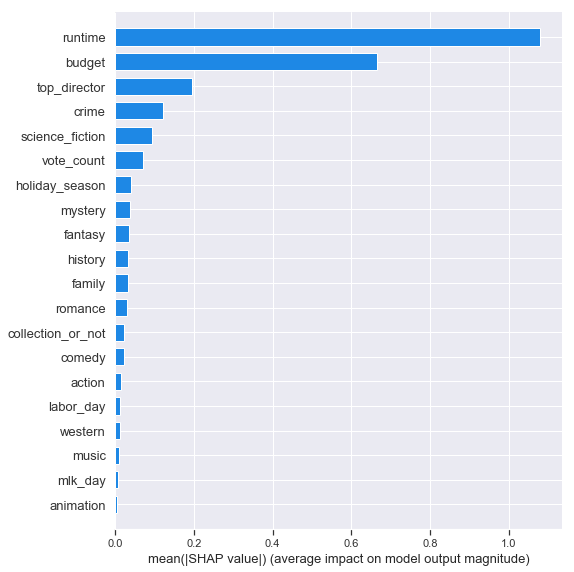

In [234]:
shap.summary_plot(shap_values_rev, 
                  X_test_select, plot_type="bar")

## Final Model: ROI

In [172]:
#Initialize GradientBoostingRegressor
gb_roi = GradientBoostingRegressor(n_estimators=1750, max_depth=2, learning_rate=0.005)

#Cross-validate on training set
cv_R2 = cross_val_score(gb_roi,X_train_roi,y_train_roi_log,cv=5)
cv_RMSE = cross_val_score(gb_roi,X_train_roi,y_train_roi_log,cv=5,scoring='neg_mean_squared_error')

#Fit model to training set and predict on test set
gb_roi.fit(X_train_roi,y_train_roi_log)
y_pred = gb_roi.predict(X_test_roi)

print('Cross-Validated Training R2:', np.mean(cv_R2))
print('Test R2:', gb_roi.score(X_test_roi,y_test_roi_log))
print('Cross-Validated Training RMSE:', -np.mean(cv_RMSE))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test_roi_log,y_pred)))

feature_importances_gb_roi = pd.DataFrame(gb_roi.feature_importances_,
                                   index = X_train_roi.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances_gb_roi.head(5))

Cross-Validated Training R2: 0.2080243144683188
Test R2: 0.19006362987576764
Cross-Validated Training RMSE: 2.1783464819883234
Test RMSE: 1.4781066401837286
                   importance
vote_count           0.629632
collection_or_not    0.152831
runtime              0.085428
action               0.019738
documentary          0.015269


### Model Explainability Example: What are the most influential features in predicting the ROI for Mission Impossible?

In [235]:
explainer = shap.TreeExplainer(gb_roi)
shap_values = explainer.shap_values(X_test_roi)
shap.force_plot(explainer.expected_value, 
                shap_values[10,:], 
                X_test_roi.iloc[10,:])

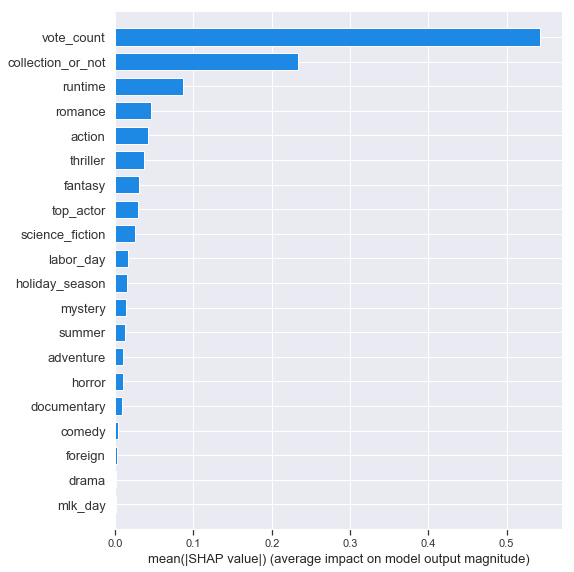

In [238]:
shap.summary_plot(shap_values, 
                  X_test_roi, plot_type="bar")

## Categorical Success

In [175]:
#Initialize GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

#Cross-validate on training set
cv_accuracy = cross_val_score(gb_clf,X_train_success,y_train_success,cv=5)

#Fit model to training set and predict on test set
gb_clf.fit(X_train_success,y_train_success)
y_pred = gb_clf.predict(X_test_success)

print('Training Accuracy:', np.mean(cv_accuracy))
print('Test Accuracy:', gb_clf.score(X_test_success,y_test_success))
print('Confusion Matrix',pd.DataFrame(confusion_matrix(y_test_success,y_pred),
                                      columns=['Predicted BreakEven','Predicted Flop','Predicted Hit'],
                                      index=['Actual BreakEven','Actual Flop','Actual Hit']))
print('Classification Report')
print(classification_report(y_test_success,y_pred))

Training Accuracy: 0.5491604807352422
Test Accuracy: 0.5281823939202026
Confusion Matrix                   Predicted BreakEven  Predicted Flop  Predicted Hit
Actual BreakEven                  222             206            103
Actual Flop                       116             402             30
Actual Hit                        164             126            210
Classification Report
              precision    recall  f1-score   support

   BreakEven       0.44      0.42      0.43       531
        Flop       0.55      0.73      0.63       548
         Hit       0.61      0.42      0.50       500

   micro avg       0.53      0.53      0.53      1579
   macro avg       0.53      0.52      0.52      1579
weighted avg       0.53      0.53      0.52      1579

